
# STC CASE
## Aplicación de algortimos de clasificación, para determinar la retención de estudiantes


Importar librerias que se utilizarán para el análisis del caso

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import warnings 
warnings.filterwarnings("ignore")

In [246]:
path="STC(A).xlsx" 

In [247]:
df = pd.read_excel(path) 

In [248]:
pd.set_option("display.max_columns",None)
df.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type Departure.Date Return.Date Deposit.Date Special.Pay  Tuition  \
0           A     2011-01-14  2011-01-14   2010-08-30         NaN      424   
1           A     2011-01-14  2011-01-21   2009-11-15          CP     2350   
2           A     2011-01-15  2011-01-17   2010-10-15         NaN     1181   
3           B     2011-01-15  2011-01-17   2011-01-07         NaN      376   
4           T     2011-01-16  2011-01-21   2010-09-30         NaN      865   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
0          25              3                 0.424 2010-03-29 2010-08-12   
1           9              9                 0.409 2009-10-20 2010-08-10   
2          17              6                 0.708 2010-04-29 2010-08-16   
3           0              0                 0.000        NaT        NaT   
4          40              8                 0.494 2010-03-29 2010-08-12   

   Cancelled.Pax  Total.Discount.Pax Initial.System.Date Poverty.Code  \
0              3                   4          2010-03-26            B   
1             11                   3          2009-10-02            C   
2              6                   3          2010-01-28            C   
3              1                   0          2010-10-19          NaN   
4              9                   8          2010-03-23            D   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   
2                Other         10.0      PUBLIC                    1   
3                Other          7.0         CHD                    0   
4                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   
2             6             8.0                    955.0            O   
3           NaN             NaN                      NaN          NaN   
4             6             8.0                    720.0            C   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   
2                0.042               0       East Coast         EXISTING   24   
3                0.000               0       East Coast         EXISTING   18   
4                0.383               0       East Coast         EXISTING   81   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents FirstMeeting  \
0         63                424                            1   2010-08-12   
1         25               2350                            2   2009-11-17   
2         27               1181                            1   2010-09-13   
3         18                376                            0          NaT   
4         89                865                            1   2010-08-24   

  LastMeeting  DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0  2010-08-12                           155.0                          155.0   
1  2010-08-27                           423.0                          140.0   
2  2010-09-13                           124.0                          124.0   
3         NaT              

In [7]:
df.shape

(2389, 56)

In [8]:
df.describe()

ID   From.Grade     To.Grade  Is.Non.Annual.         Days  \
count  2389.000000  2262.000000  2239.000000     2389.000000  2389.000000   
mean   1195.000000     7.268347     7.912908        0.154039     4.575136   
std     689.789219     1.388350     1.558226        0.361062     1.432128   
min       1.000000     3.000000     3.000000        0.000000     1.000000   
25%     598.000000     7.000000     8.000000        0.000000     4.000000   
50%    1195.000000     8.000000     8.000000        0.000000     5.000000   
75%    1792.000000     8.000000     8.000000        0.000000     5.000000   
max    2389.000000    12.000000    12.000000        1.000000    12.000000   

           Tuition   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  \
count  2389.000000  2389.000000    2389.000000           2389.000000   
mean   1615.217664    16.867727       3.305567              0.570743   
std     645.096047    16.942782       3.677022              0.230666   
min      79.000000     0.000000       0.000000              0.000000   
25%    1174.000000     6.000000       1.000000              0.455000   
50%    1700.000000    12.000000       2.000000              0.600000   
75%    2048.000000    23.000000       4.000000              0.727000   
max    4200.000000   257.000000      45.000000              1.000000   

       Cancelled.Pax  Total.Discount.Pax  CRM.Segment  Parent.Meeting.Flag  \
count    2389.000000         2389.000000  2385.000000          2389.000000   
mean        4.807451            2.953537     6.920335             0.858937   
std         4.661194            2.876422     2.745410             0.348160   
min         0.000000            0.000000     1.000000             0.000000   
25%         2.000000            1.000000     5.000000             1.000000   
50%         4.000000            2.000000     6.000000             1.000000   
75%         6.000000            4.000000    10.000000             1.000000   
max        39.000000           47.000000    11.000000             1.000000   

       MDR.High.Grade  Total.School.Enrollment  EZ.Pay.Take.Up.Rate  \
count     2321.000000              2298.000000          2389.000000   
mean         8.392072               648.358573             0.711833   
std          1.746328               411.727720            24.649759   
min          1.000000                19.000000             0.000000   
25%          8.000000               360.000000             0.100000   
50%          8.000000               597.000000             0.200000   
75%          8.000000               825.750000             0.292000   
max         12.000000              3990.000000          1205.000000   

       School.Sponsor          FPP    Total.Pax  SPR.Group.Revenue  \
count     2389.000000  2389.000000  2389.000000        2389.000000   
mean         0.105902    31.297195    34.250733        1615.217664   
std          0.307777    29.131503    31.590096         645.096047   
min          0.000000     2.000000     2.000000          79.000000   
25%          0.000000    12.000000    14.000000        1174.000000   
50%          0.000000    23.000000    26.000000        1700.000000   
75%          0.000000    41.000000    44.000000        2048.000000   
max          1.000000   286.000000   313.000000        4200.000000   

       NumberOfMeetingswithParents  DifferenceTraveltoFirstMeeting  \
count                  2389.000000                     2052.000000   
mean                      1.102135                      262.083821   
std                       0.611544                       79.520208   
min                       0.000000                     -204.000000   
25%                       1.000000                      208.000000   
50%                       1.000000                      250.000000   
75%                       1.000000                      287.000000   
max                       2.000000                      749.000000   

       DifferenceTraveltoLastMeeting  SingleGradeTripFlag  \
count  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   int64         
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   int64         
 6   Days                            2389 non-null   int64         
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

# Limpieza

En esta sección se analiza el contenido único de cada una de las variables explicatorias a analizar:

In [10]:
df['Program.Code'].unique()

array(['HS', 'HC', 'HD', 'HN', 'SG', 'FN', 'CC', 'CD', 'HVP', 'SM', 'HG',
       'HP', 'SK', 'HW', 'SC', 'IC', 'HY', 'CVP', 'HF', 'ST', 'HZ', 'CN',
       'HO', 'HX', 'HIS', 'SD', 'HH', 'IK'], dtype=object)

In [11]:
df['Program.Code'].value_counts()

HD     1430
HC      274
HS      131
CD      114
HN       73
SK       68
HVP      62
SC       46
ST       28
HG       25
SM       23
SG       20
CC       14
IC       12
HO       11
HW        9
HZ        7
HY        7
HF        6
HIS       5
CN        4
SD        4
CVP       3
HP        3
HX        3
HH        3
IK        3
FN        1
Name: Program.Code, dtype: int64

In [12]:
df['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'VA', 'LA', 'MA', 'MX', 'TX', 'IA', 'MI', 'NY',
       'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS',
       'AL', 'MS', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK',
       'GA', 'NJ', 'WA', 'NV', 'RI', 'MT', 'CT', 'Cayman Islands', 'PR',
       'UT', 'PA', 'ME', 'MD', 'VT', 'NH', 'AB', 'Bermuda', 'WV', 'SD',
       'ND', 'WY'], dtype=object)

Para la variable Group State se agrega un atributo llamado **'otros'** en donde se agrupan los valores **'AB', 'Bermuda', 'Cayman Islands', 'MX', 'PR'**, los cuáles tienen poca frecuencia en el set de datos.

In [13]:
unicos=df['Group.State'].unique().tolist()
len(unicos)
set_estados_group = set(unicos)
estados= ['CA', 'AZ', 'FL', 'VA', 'LA', 'MA','TX', 'IA', 'MI', 'NY', 'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 
          'MO', 'ID', 'TN', 'KS', 'AL', 'MS', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 
          'AK', 'GA', 'WA', 'NV', 'MT', 'CT', 'UT', 'PA', 'ME', 'MD', 'VT', 'NH', 'WV', 'SD', 'ND', 'WY', 'NJ', 'RI', 'DE']
set_estados=set(estados)
sobrantes= set_estados_group - set_estados
df['Group.State']=df['Group.State'].replace('AB','Other')
df['Group.State']=df['Group.State'].replace('Bermuda','Other')
df['Group.State']=df['Group.State'].replace('Cayman Islands','Other')
df['Group.State']=df['Group.State'].replace('MX','Other')
df['Group.State']=df['Group.State'].replace('PR','Other')

In [14]:
df['Travel.Type'].unique()


array(['A', 'B', 'T', 'N'], dtype=object)

In [15]:
df['Travel.Type'].value_counts()

A    2014
B     367
T       6
N       2
Name: Travel.Type, dtype: int64

In [16]:
df['Special.Pay'].unique()

array([nan, 'CP', 'FR', 'SA'], dtype=object)

In [17]:
df['Special.Pay'].value_counts()

FR    293
SA    107
CP     70
Name: Special.Pay, dtype: int64

Para la variable Poverty Code el valor de 0 no esta definido en el diccionario, por lo que se agrega al atributo 'E'

In [18]:
df['Poverty.Code'].value_counts()

B    961
C    507
A    265
D     36
E     17
0      4
Name: Poverty.Code, dtype: int64

In [19]:
df['Poverty.Code']=df['Poverty.Code'].replace(0,'E')

In [20]:
df['Region'].unique()

array(['Southern California', 'Other', 'Houston', 'Northern California',
       'Dallas', 'Pacific Northwest'], dtype=object)

In [21]:
df['School.Type'].unique() 


array(['PUBLIC', 'CHD', 'Catholic', 'Private non-Christian'], dtype=object)

In [22]:
df['School.Type'].value_counts()

PUBLIC                   1818
CHD                       257
Catholic                  163
Private non-Christian     151
Name: School.Type, dtype: int64

In [23]:
df['MDR.Low.Grade'].unique()
#tiene letras y nros, pero estaria bien comparando con GroupGradeTypeLow

array(['K', 7, 6, nan, 10, 9, 'PK', 5, 3, 2, 1, 4, 8], dtype=object)

In [24]:
df['Income.Level'].unique()


array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P5', 'N', 'H', 'E',
       'M', 'P', 'P1', 'J', 'P3', 'Z', 'B', 'F', 'D', 'P4'], dtype=object)

In [25]:
df['Income.Level'].value_counts()

Q     283
O     266
L     214
P     212
M     189
J     160
I     159
N     148
K     123
F     105
G      91
H      85
E      80
C      67
Z      44
D      41
B      33
A      20
P1      2
P3      2
P4      2
P5      1
Name: Income.Level, dtype: int64

In [26]:
df['SPR.Product.Type'].unique()

array(['CA History', 'East Coast', 'Science', 'Costa Rica',
       'International', 'IL History'], dtype=object)

In [27]:
df['SPR.New.Existing'].unique()

array(['EXISTING', 'NEW'], dtype=object)

In [28]:
df['SchoolGradeTypeLow'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [29]:
df['SchoolGradeTypeLow'].value_counts()

Middle        1862
Elementary     259
High           141
Undefined      127
Name: SchoolGradeTypeLow, dtype: int64

In [30]:
df['SchoolGradeTypeHigh'].unique() 

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [31]:
df['SchoolGradeTypeHigh'].value_counts() 

Middle        1778
High           265
Elementary     196
Undefined      150
Name: SchoolGradeTypeHigh, dtype: int64

In [32]:
df['SchoolGradeType'].unique() #sacar de analisis es lo mismo que schoolgradetypes

array(['Elementary->Elementary', 'Middle->Middle', 'High->High',
       'Undefined->Undefined', 'Middle->Undefined', 'Elementary->Middle',
       'Middle->High', 'Elementary->High', 'Elementary->Undefined'],
      dtype=object)

In [33]:
df['SchoolGradeType'].value_counts()

Middle->Middle            1721
Elementary->Elementary     196
High->High                 141
Undefined->Undefined       127
Middle->High               120
Elementary->Middle          57
Middle->Undefined           21
Elementary->High             4
Elementary->Undefined        2
Name: SchoolGradeType, dtype: int64

In [34]:
df['DepartureMonth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [35]:
df['GroupGradeTypeLow'].unique() 

array(['K', 'Middle', 'Undefined', 'High', 'PK', 'Elementary'],
      dtype=object)

In [36]:
df['GroupGradeTypeHigh'].unique() 

array(['Elementary', 'Middle', 'Undefined', 'High'], dtype=object)

In [37]:
df['GroupGradeType'].unique()  #sacar de analisis es lo mismo que groupgradetypes

array(['K->Elementary', 'Middle->Middle', 'Undefined->Undefined',
       'High->High', 'Middle->High', 'PK->Middle', 'K->High',
       'Elementary->Middle', 'PK->High', 'K->Middle',
       'Elementary->Elementary', 'PK->Elementary', 'Elementary->High'],
      dtype=object)

In [38]:
df['MajorProgramCode'].unique() 

array(['H', 'S', 'I', 'C'], dtype=object)

In [39]:
df['SchoolSizeIndicator'].unique() 

array(['L', nan, 'M-L', 'S', 'S-M'], dtype=object)

Una vez analizados los valores únicos dentro de cada variable explicativa, se analizan la cantidad de nulos por variable, de igual forma el porcentaje de nulos para cada variable

In [40]:
cn=(df.isnull().sum(axis=0))
cn=cn[cn>0]
cn

From.Grade                         127
To.Grade                           150
Special.Pay                       1919
Early.RPL                          673
Latest.RPL                          19
Initial.System.Date                  8
Poverty.Code                       599
CRM.Segment                          4
MDR.Low.Grade                       68
MDR.High.Grade                      68
Total.School.Enrollment             91
Income.Level                        62
FirstMeeting                       337
LastMeeting                        337
DifferenceTraveltoFirstMeeting     337
DifferenceTraveltoLastMeeting      337
FPP.to.School.enrollment            91
SchoolSizeIndicator                 91
dtype: int64

In [41]:
# Porcentaje de valores nulos
p=(((df.isnull().sum(axis=0))/2389)*100)
p=p[p>0]
p=pd.DataFrame(p)
p.reset_index(inplace=True)
p.columns=['Variable','%']
p

Variable          %
0                       From.Grade   5.316032
1                         To.Grade   6.278778
2                      Special.Pay  80.326496
3                        Early.RPL  28.170783
4                       Latest.RPL   0.795312
5              Initial.System.Date   0.334868
6                     Poverty.Code  25.073252
7                      CRM.Segment   0.167434
8                    MDR.Low.Grade   2.846379
9                   MDR.High.Grade   2.846379
10         Total.School.Enrollment   3.809125
11                    Income.Level   2.595228
12                    FirstMeeting  14.106321
13                     LastMeeting  14.106321
14  DifferenceTraveltoFirstMeeting  14.106321
15   DifferenceTraveltoLastMeeting  14.106321
16        FPP.to.School.enrollment   3.809125
17             SchoolSizeIndicator   3.809125

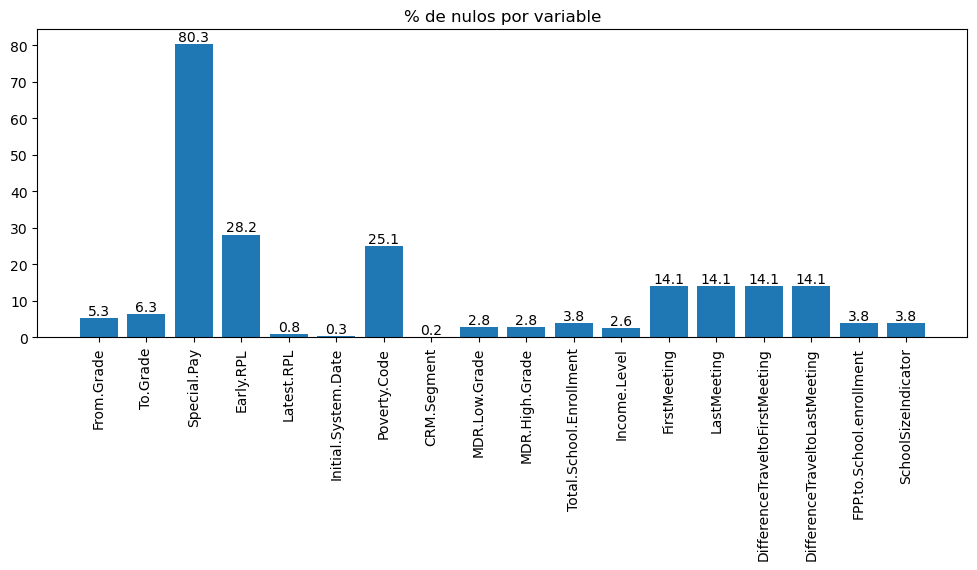

In [42]:
fig, ax = plt.subplots()
bars=ax.bar(x='Variable',
            data=p,
            height= '%'
            )
ax.bar_label(bars,fmt='%.1f')
fig.set_size_inches(12,4)
ax.set_xticklabels(p['Variable'], rotation='vertical')
ax.set_title('% de nulos por variable')
plt.show()

A partir de aquí se agregan columnas para obtener la diferencia en número de días que han pasado entre las siguientes variables. Eliminando del modelo las variables con formato fecha

In [43]:
df['dias.viaje']=(df['Return.Date'] - df['Departure.Date']).dt.days
 #se crea 1 columna nueva de diferencia de dias, en vez de tomar ambas fechas

In [44]:
df['dias.desde.depósito']=(df['Departure.Date'] - df['Deposit.Date']).dt.days

In [45]:
df['dias.comunicacion']=(df['Latest.RPL'] - df['Early.RPL']).dt.days

In [46]:
df['dias.reunion']=(df['LastMeeting'] - df['FirstMeeting']).dt.days
df['dias.reunion'].fillna(value=0,inplace=True)

In [47]:
df['dias.inicial.depar']=(df['Departure.Date'] - df['Initial.System.Date']).dt.days

In [48]:
#DifferenceTraveltoFirstMeeting y DifferenceTraveltoLastMeeting se convierte los NA a 0 concordando con diccionario
df['DifferenceTraveltoFirstMeeting'].fillna(value=0,inplace=True)
df['DifferenceTraveltoLastMeeting'].fillna(value=0,inplace=True)

In [49]:
df['LastMeeting'].fillna(value=0,inplace=True)
df['FirstMeeting'].fillna(value=0,inplace=True)
#se convierte los NA a 0 concordando con diccionario

In [50]:
df.head() #se validan nuevas columnas

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type Departure.Date Return.Date Deposit.Date Special.Pay  Tuition  \
0           A     2011-01-14  2011-01-14   2010-08-30         NaN      424   
1           A     2011-01-14  2011-01-21   2009-11-15          CP     2350   
2           A     2011-01-15  2011-01-17   2010-10-15         NaN     1181   
3           B     2011-01-15  2011-01-17   2011-01-07         NaN      376   
4           T     2011-01-16  2011-01-21   2010-09-30         NaN      865   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
0          25              3                 0.424 2010-03-29 2010-08-12   
1           9              9                 0.409 2009-10-20 2010-08-10   
2          17              6                 0.708 2010-04-29 2010-08-16   
3           0              0                 0.000        NaT        NaT   
4          40              8                 0.494 2010-03-29 2010-08-12   

   Cancelled.Pax  Total.Discount.Pax Initial.System.Date Poverty.Code  \
0              3                   4          2010-03-26            B   
1             11                   3          2009-10-02            C   
2              6                   3          2010-01-28            C   
3              1                   0          2010-10-19          NaN   
4              9                   8          2010-03-23            D   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   
2                Other         10.0      PUBLIC                    1   
3                Other          7.0         CHD                    0   
4                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   
2             6             8.0                    955.0            O   
3           NaN             NaN                      NaN          NaN   
4             6             8.0                    720.0            C   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   
2                0.042               0       East Coast         EXISTING   24   
3                0.000               0       East Coast         EXISTING   18   
4                0.383               0       East Coast         EXISTING   81   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
0         63                424                            1   
1         25               2350                            2   
2         27               1181                            1   
3         18                376                            0   
4         89                865                            1   

          FirstMeeting          LastMeeting  DifferenceTraveltoFirstMeeting  \
0  2010-08-12 00:00:00  2010-08-12 00:00:00                           155.0   
1  2009-11-17 00:00:00  2010-08-27 00:00:00                           423.0   
2  2010-09-13 00:00:00  2010-09-13 00:00:00                           124.0   
3                    0                    0                             0.0   
4  2010-08-24 00:00:00  2010-0

Reemplazar valores nulos en variables continuas con KNN imputer, considerandolo como optimo ya que se trata de un imputador multivariado, considerando el comportamiento de sus vecinos cercanos.

In [51]:
# Se realiza una extracción de la base de datos solamente con las variables númericas.
df_num=df[['Tuition', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Total.School.Enrollment',
       'EZ.Pay.Take.Up.Rate', 'FPP', 'Total.Pax', 'SPR.Group.Revenue',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
       'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'dias.viaje', 'dias.desde.depósito',
       'dias.comunicacion', 'dias.reunion', 'dias.inicial.depar']]

df_num 

Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  \
0         424          25              3                 0.424              3   
1        2350           9              9                 0.409             11   
2        1181          17              6                 0.708              6   
3         376           0              0                 0.000              1   
4         865          40              8                 0.494              9   
...       ...         ...            ...                   ...            ...   
2384     1892          18              4                 0.514              7   
2385     1699          16              4                 0.800              4   
2386     2149           0              0                 0.000              0   
2387      449           3              2                 0.188              1   
2388     2135          15              9                 0.652             17   

      Total.Discount.Pax  Total.School.Enrollment  EZ.Pay.Take.Up.Rate  FPP  \
0                      4                    927.0                0.170   59   
1                      3                    850.0                0.091   22   
2                      3                    955.0                0.042   24   
3                      0                      NaN                0.000   18   
4                      8                    720.0                0.383   81   
...                  ...                      ...                  ...  ...   
2384                   3                   1844.0                0.057   35   
2385                   2                    575.0                0.350   20   
2386                   4                      NaN                0.000   30   
2387                   1                      NaN                0.188   16   
2388                   3                    830.0                0.217   23   

      Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
0            63                424                            1   
1            25               2350                            2   
2            27               1181                            1   
3            18                376                            0   
4            89                865                            1   
...         ...                ...                          ...   
2384         38               1892                            0   
2385         22               1699                            2   
2386         34               2149                            0   
2387         17                449                            1   
2388         26               2135                            1   

      DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0                              155.0                          155.0   
1                              423.0                          140.0   
2                              124.0                          124.0   
3                                0.0                            0.0   
4                              145.0                          145.0   
...                              ...                            ...   
2384                             0.0                            0.0   
2385                           419.0                          265.0   
2386                             0.0                            0.0   
2387                           287.0                          287.0   
2388                           273.0                          273.0   

      FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  dias.viaje  \
0                     0.063646    0.936508                   4           0   
1                     0.025882    0.880000                   3           7   
2                     0.025131    0.888889                   3           2   
3                          NaN    1.000000                   0           2   
4                     0.112500    0.

In [52]:
#Variable C= a la lista de variables númericas
c=df_num.columns.tolist()
#instanciar imputador
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(df_num)
df_num = imputer.transform(df_num)

#Creación del data frame númerico limpio
df_num_limpio=pd.DataFrame(df_num,columns=c)
df_num_limpio.head()
(df_num_limpio.isnull().sum(axis=0))#Código para comprobar que ya no exista valores faltantes en la base de datos de variables númericas. 

Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
FRP.Take.up.percent.              0
Cancelled.Pax                     0
Total.Discount.Pax                0
Total.School.Enrollment           0
EZ.Pay.Take.Up.Rate               0
FPP                               0
Total.Pax                         0
SPR.Group.Revenue                 0
NumberOfMeetingswithParents       0
DifferenceTraveltoFirstMeeting    0
DifferenceTraveltoLastMeeting     0
FPP.to.School.enrollment          0
FPP.to.PAX                        0
Num.of.Non_FPP.PAX                0
dias.viaje                        0
dias.desde.depósito               0
dias.comunicacion                 0
dias.reunion                      0
dias.inicial.depar                0
dtype: int64

In [53]:
df_num_limpio.shape

(2389, 22)

Reemplazo de valores nulos para variables categoricas con moda.
Pero se crean dummies para las var categoricas Special Pay y Poverty code, concordando su % de nulos, para no perder datos, ni para sesgarlos


In [54]:
#Se realiza una extracción de la base de datos con variables categoricas concordando con diccionario
df_cat_limpio=df[['ID','Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Special.Pay', 'Poverty.Code',
       'Region', 'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag',
       'MDR.Low.Grade', 'MDR.High.Grade', 'Income.Level', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'DepartureMonth', 'GroupGradeTypeLow',
       'GroupGradeTypeHigh', 'MajorProgramCode', 'SingleGradeTripFlag',
       'SchoolSizeIndicator','Retained.in.2012.']]

In [55]:
(df_cat_limpio.isnull().sum(axis=0))

ID                        0
Program.Code              0
From.Grade              127
To.Grade                150
Group.State               0
Is.Non.Annual.            0
Days                      0
Travel.Type               0
Special.Pay            1919
Poverty.Code            599
Region                    0
CRM.Segment               4
School.Type               0
Parent.Meeting.Flag       0
MDR.Low.Grade            68
MDR.High.Grade           68
Income.Level             62
School.Sponsor            0
SPR.Product.Type          0
SPR.New.Existing          0
SchoolGradeTypeLow        0
SchoolGradeTypeHigh       0
DepartureMonth            0
GroupGradeTypeLow         0
GroupGradeTypeHigh        0
MajorProgramCode          0
SingleGradeTripFlag       0
SchoolSizeIndicator      91
Retained.in.2012.         0
dtype: int64

In [56]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
df_cat_limpio['Special.Pay'] = imputer.fit_transform(df_cat_limpio[['Special.Pay']])
df_cat_limpio['Poverty.Code'] = imputer.fit_transform(df_cat_limpio[['Poverty.Code']])
df_cat_limpio.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type    Special.Pay   Poverty.Code               Region  CRM.Segment  \
0           A  missing_value              B  Southern California          4.0   
1           A             CP              C                Other         10.0   
2           A  missing_value              C                Other         10.0   
3           B  missing_value  missing_value                Other          7.0   
4           T  missing_value              D                Other         10.0   

  School.Type  Parent.Meeting.Flag MDR.Low.Grade  MDR.High.Grade Income.Level  \
0      PUBLIC                    1             K             5.0            Q   
1      PUBLIC                    1             7             8.0            A   
2      PUBLIC                    1             6             8.0            O   
3         CHD                    0           NaN             NaN          NaN   
4      PUBLIC                    1             6             8.0            C   

   School.Sponsor SPR.Product.Type SPR.New.Existing SchoolGradeTypeLow  \
0               1       CA History         EXISTING         Elementary   
1               0       East Coast         EXISTING             Middle   
2               0       East Coast         EXISTING             Middle   
3               0       East Coast         EXISTING               High   
4               0       East Coast         EXISTING             Middle   

  SchoolGradeTypeHigh DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
0          Elementary        January                 K         Elementary   
1              Middle        January            Middle             Middle   
2              Middle        January            Middle             Middle   
3                High        January         Undefined          Undefined   
4              Middle        January            Middle             Middle   

  MajorProgramCode  SingleGradeTripFlag SchoolSizeIndicator  Retained.in.2012.  
0                H                    1                   L                  1  
1                H                    1                   L                  1  
2                H                    1                   L                  1  
3                H                    0                 NaN                  0  
4                H                    0                 M-L                  0

In [57]:
columnas_seleccionadas = ['Special.Pay', 'Poverty.Code']
df_cat_limpio = pd.get_dummies(df_cat_limpio, columns=columnas_seleccionadas) 

In [58]:
df_cat_limpio.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type               Region  CRM.Segment School.Type  \
0           A  Southern California          4.0      PUBLIC   
1           A                Other         10.0      PUBLIC   
2           A                Other         10.0      PUBLIC   
3           B                Other          7.0         CHD   
4           T                Other         10.0      PUBLIC   

   Parent.Meeting.Flag MDR.Low.Grade  MDR.High.Grade Income.Level  \
0                    1             K             5.0            Q   
1                    1             7             8.0            A   
2                    1             6             8.0            O   
3                    0           NaN             NaN          NaN   
4                    1             6             8.0            C   

   School.Sponsor SPR.Product.Type SPR.New.Existing SchoolGradeTypeLow  \
0               1       CA History         EXISTING         Elementary   
1               0       East Coast         EXISTING             Middle   
2               0       East Coast         EXISTING             Middle   
3               0       East Coast         EXISTING               High   
4               0       East Coast         EXISTING             Middle   

  SchoolGradeTypeHigh DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
0          Elementary        January                 K         Elementary   
1              Middle        January            Middle             Middle   
2              Middle        January            Middle             Middle   
3                High        January         Undefined          Undefined   
4              Middle        January            Middle             Middle   

  MajorProgramCode  SingleGradeTripFlag SchoolSizeIndicator  \
0                H                    1                   L   
1                H                    1                   L   
2                H                    1                   L   
3                H                    0                 NaN   
4                H                    0                 M-L   

   Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  Special.Pay_SA  \
0                  1               0               0               0   
1                  1               1               0               0   
2                  1               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   

   Special.Pay_missing_value  Poverty.Code_A  Poverty.Code_B  Poverty.Code_C  \
0                          1               0               1               0   
1                          0               0               0               1   
2                          1               0               0               1   
3                          1               0               0               0   
4                          1               0               0               0   

   Poverty.Code_D  Poverty.Code_E  Poverty.Code_missing_value  
0               0               0                           0  
1               0               0                           0  
2               0               0                           0  
3               0               0                           1  
4               1               0                           0

In [59]:

#se reemplazan nulos de categoricas con moda
df_cat_limpio['MDR.Low.Grade'].fillna(df_cat_limpio['MDR.Low.Grade'].mode()[0], inplace=True)
df_cat_limpio['Income.Level'].fillna(df_cat_limpio['Income.Level'].mode()[0], inplace=True)
df_cat_limpio['SchoolSizeIndicator'].fillna(df_cat_limpio['SchoolSizeIndicator'].mode()[0], inplace=True)
df_cat_limpio['From.Grade'].fillna(df_cat_limpio['From.Grade'].mode()[0], inplace=True)
df_cat_limpio['To.Grade'].fillna(df_cat_limpio['To.Grade'].mode()[0], inplace=True)
df_cat_limpio['CRM.Segment'].fillna(df_cat_limpio['CRM.Segment'].mode()[0], inplace=True)
df_cat_limpio['MDR.High.Grade'].fillna(df_cat_limpio['MDR.High.Grade'].mode()[0], inplace=True)

In [60]:
df_cat_limpio.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type               Region  CRM.Segment School.Type  \
0           A  Southern California          4.0      PUBLIC   
1           A                Other         10.0      PUBLIC   
2           A                Other         10.0      PUBLIC   
3           B                Other          7.0         CHD   
4           T                Other         10.0      PUBLIC   

   Parent.Meeting.Flag MDR.Low.Grade  MDR.High.Grade Income.Level  \
0                    1             K             5.0            Q   
1                    1             7             8.0            A   
2                    1             6             8.0            O   
3                    0             6             8.0            Q   
4                    1             6             8.0            C   

   School.Sponsor SPR.Product.Type SPR.New.Existing SchoolGradeTypeLow  \
0               1       CA History         EXISTING         Elementary   
1               0       East Coast         EXISTING             Middle   
2               0       East Coast         EXISTING             Middle   
3               0       East Coast         EXISTING               High   
4               0       East Coast         EXISTING             Middle   

  SchoolGradeTypeHigh DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
0          Elementary        January                 K         Elementary   
1              Middle        January            Middle             Middle   
2              Middle        January            Middle             Middle   
3                High        January         Undefined          Undefined   
4              Middle        January            Middle             Middle   

  MajorProgramCode  SingleGradeTripFlag SchoolSizeIndicator  \
0                H                    1                   L   
1                H                    1                   L   
2                H                    1                   L   
3                H                    0                 S-M   
4                H                    0                 M-L   

   Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  Special.Pay_SA  \
0                  1               0               0               0   
1                  1               1               0               0   
2                  1               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   

   Special.Pay_missing_value  Poverty.Code_A  Poverty.Code_B  Poverty.Code_C  \
0                          1               0               1               0   
1                          0               0               0               1   
2                          1               0               0               1   
3                          1               0               0               0   
4                          1               0               0               0   

   Poverty.Code_D  Poverty.Code_E  Poverty.Code_missing_value  
0               0               0                           0  
1               0               0                           0  
2               0               0                           0  
3               0               0                           1  
4               1               0                           0

In [61]:
df_cat_limpio.isnull().sum(axis=0)# Codigo para comprobar que ya no hay valores nulos en variables categoricas

ID                            0
Program.Code                  0
From.Grade                    0
To.Grade                      0
Group.State                   0
Is.Non.Annual.                0
Days                          0
Travel.Type                   0
Region                        0
CRM.Segment                   0
School.Type                   0
Parent.Meeting.Flag           0
MDR.Low.Grade                 0
MDR.High.Grade                0
Income.Level                  0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
SchoolGradeTypeLow            0
SchoolGradeTypeHigh           0
DepartureMonth                0
GroupGradeTypeLow             0
GroupGradeTypeHigh            0
MajorProgramCode              0
SingleGradeTripFlag           0
SchoolSizeIndicator           0
Retained.in.2012.             0
Special.Pay_CP                0
Special.Pay_FR                0
Special.Pay_SA                0
Special.Pay_missing_value     0
Poverty.

In [62]:
df_cat_limpio.shape

(2389, 37)

In [63]:
df_limpio=pd.concat([df_cat_limpio, df_num_limpio], axis=1)
df_limpio.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type               Region  CRM.Segment School.Type  \
0           A  Southern California          4.0      PUBLIC   
1           A                Other         10.0      PUBLIC   
2           A                Other         10.0      PUBLIC   
3           B                Other          7.0         CHD   
4           T                Other         10.0      PUBLIC   

   Parent.Meeting.Flag MDR.Low.Grade  MDR.High.Grade Income.Level  \
0                    1             K             5.0            Q   
1                    1             7             8.0            A   
2                    1             6             8.0            O   
3                    0             6             8.0            Q   
4                    1             6             8.0            C   

   School.Sponsor SPR.Product.Type SPR.New.Existing SchoolGradeTypeLow  \
0               1       CA History         EXISTING         Elementary   
1               0       East Coast         EXISTING             Middle   
2               0       East Coast         EXISTING             Middle   
3               0       East Coast         EXISTING               High   
4               0       East Coast         EXISTING             Middle   

  SchoolGradeTypeHigh DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
0          Elementary        January                 K         Elementary   
1              Middle        January            Middle             Middle   
2              Middle        January            Middle             Middle   
3                High        January         Undefined          Undefined   
4              Middle        January            Middle             Middle   

  MajorProgramCode  SingleGradeTripFlag SchoolSizeIndicator  \
0                H                    1                   L   
1                H                    1                   L   
2                H                    1                   L   
3                H                    0                 S-M   
4                H                    0                 M-L   

   Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  Special.Pay_SA  \
0                  1               0               0               0   
1                  1               1               0               0   
2                  1               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   

   Special.Pay_missing_value  Poverty.Code_A  Poverty.Code_B  Poverty.Code_C  \
0                          1               0               1               0   
1                          0               0               0               1   
2                          1               0               0               1   
3                          1               0               0               0   
4                          1               0               0               0   

   Poverty.Code_D  Poverty.Code_E  Poverty.Code_missing_value  Tuition  \
0               0               0                           0    424.0   
1               0               0                           0   2350.0   
2               0               0                           0   1181.0   
3               0               0                           1    376.0   
4               1               0                           0    865.0   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  \
0        25.0            

In [64]:
df_limpio.shape

(2389, 59)

In [65]:
#df_limpio.to_excel('df_limpio.xlsx')

# Análisis exploratorio

Se cambian los tipos de datos:

In [66]:
#cambiando las var numericas a categoricas según corresponda

df_limpio['ID'] = df_limpio['ID'].astype(str)
df_limpio['Is.Non.Annual.'] = df_limpio['Is.Non.Annual.'].astype(str)
df_limpio['CRM.Segment'] = df_limpio['CRM.Segment'].astype(str)
df_limpio['Parent.Meeting.Flag'] = df_limpio['Parent.Meeting.Flag'].astype(str)
df_limpio['MDR.High.Grade'] = df_limpio['MDR.High.Grade'].astype(str)
df_limpio['School.Sponsor'] = df_limpio['School.Sponsor'].astype(str) 
df_limpio['SingleGradeTripFlag'] = df_limpio['SingleGradeTripFlag'].astype(str) 
df_limpio['Retained.in.2012.'] = df_limpio['Retained.in.2012.'].astype(str)
df_limpio['From.Grade'] = df_limpio['From.Grade'].astype(str)
df_limpio['To.Grade'] = df_limpio['To.Grade'].astype(str)
df_limpio['Days'] = df_limpio['Days'].astype(str)
df_limpio['Special.Pay_CP'] = df_limpio['Special.Pay_CP'].astype(str)
df_limpio['Special.Pay_FR'] = df_limpio['Special.Pay_FR'].astype(str)
df_limpio['Special.Pay_SA'] = df_limpio['Special.Pay_SA'].astype(str)
df_limpio['Special.Pay_missing_value'] = df_limpio['Special.Pay_missing_value'].astype(str)
df_limpio['Poverty.Code_A'] = df_limpio['Poverty.Code_A'].astype(str)
df_limpio['Poverty.Code_B'] = df_limpio['Poverty.Code_B'].astype(str)
df_limpio['Poverty.Code_C'] = df_limpio['Poverty.Code_C'].astype(str)
df_limpio['Poverty.Code_D'] = df_limpio['Poverty.Code_D'].astype(str)
df_limpio['Poverty.Code_E'] = df_limpio['Poverty.Code_E'].astype(str)
df_limpio['Poverty.Code_missing_value'] = df_limpio['Poverty.Code_missing_value'].astype(str)

#df['From.Grade'] = df['From.Grade'].astype('category') haria lo mismo que str, no reconoceria nulos

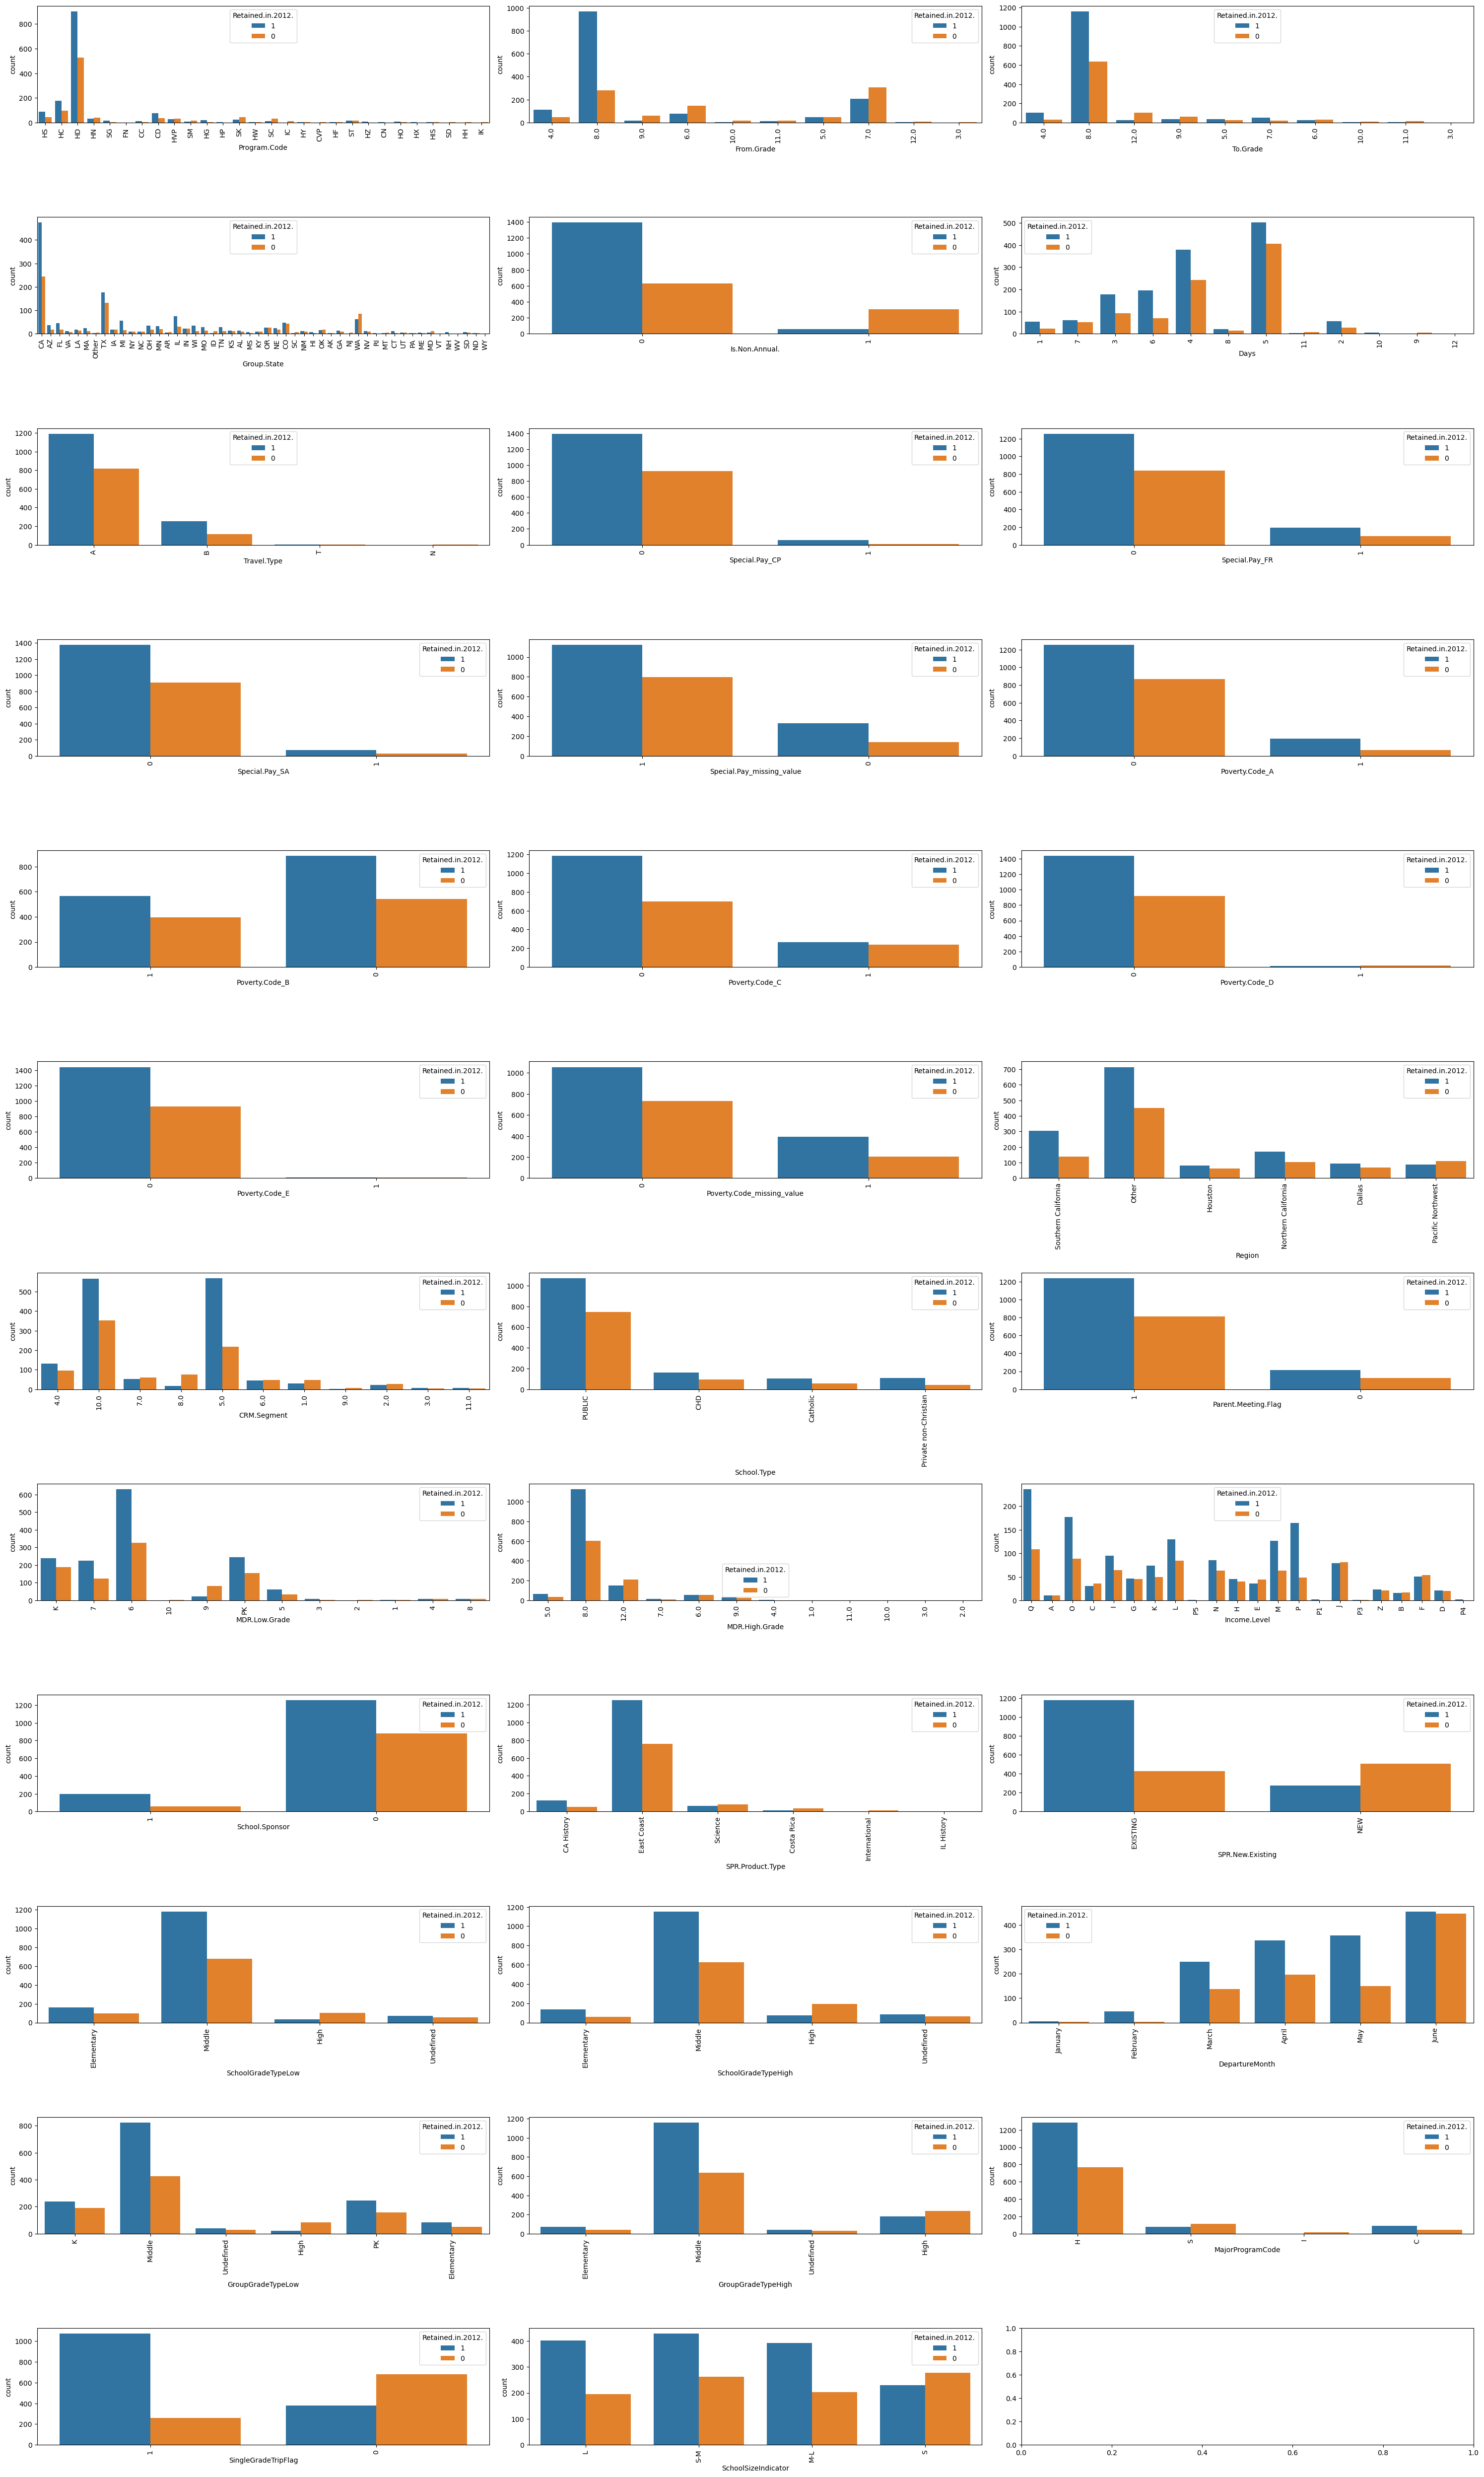

In [67]:
cat_var=['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Special.Pay_CP','Special.Pay_FR','Special.Pay_SA','Special.Pay_missing_value',
        'Poverty.Code_A','Poverty.Code_B','Poverty.Code_C','Poverty.Code_D','Poverty.Code_E','Poverty.Code_missing_value',
       'Region', 'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag',
       'MDR.Low.Grade', 'MDR.High.Grade', 'Income.Level', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'DepartureMonth', 'GroupGradeTypeLow',
       'GroupGradeTypeHigh', 'MajorProgramCode', 'SingleGradeTripFlag',
       'SchoolSizeIndicator',] 
fig,axs=plt.subplots(nrows=12,ncols=3,figsize=(30,50))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=df_limpio, hue='Retained.in.2012.',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

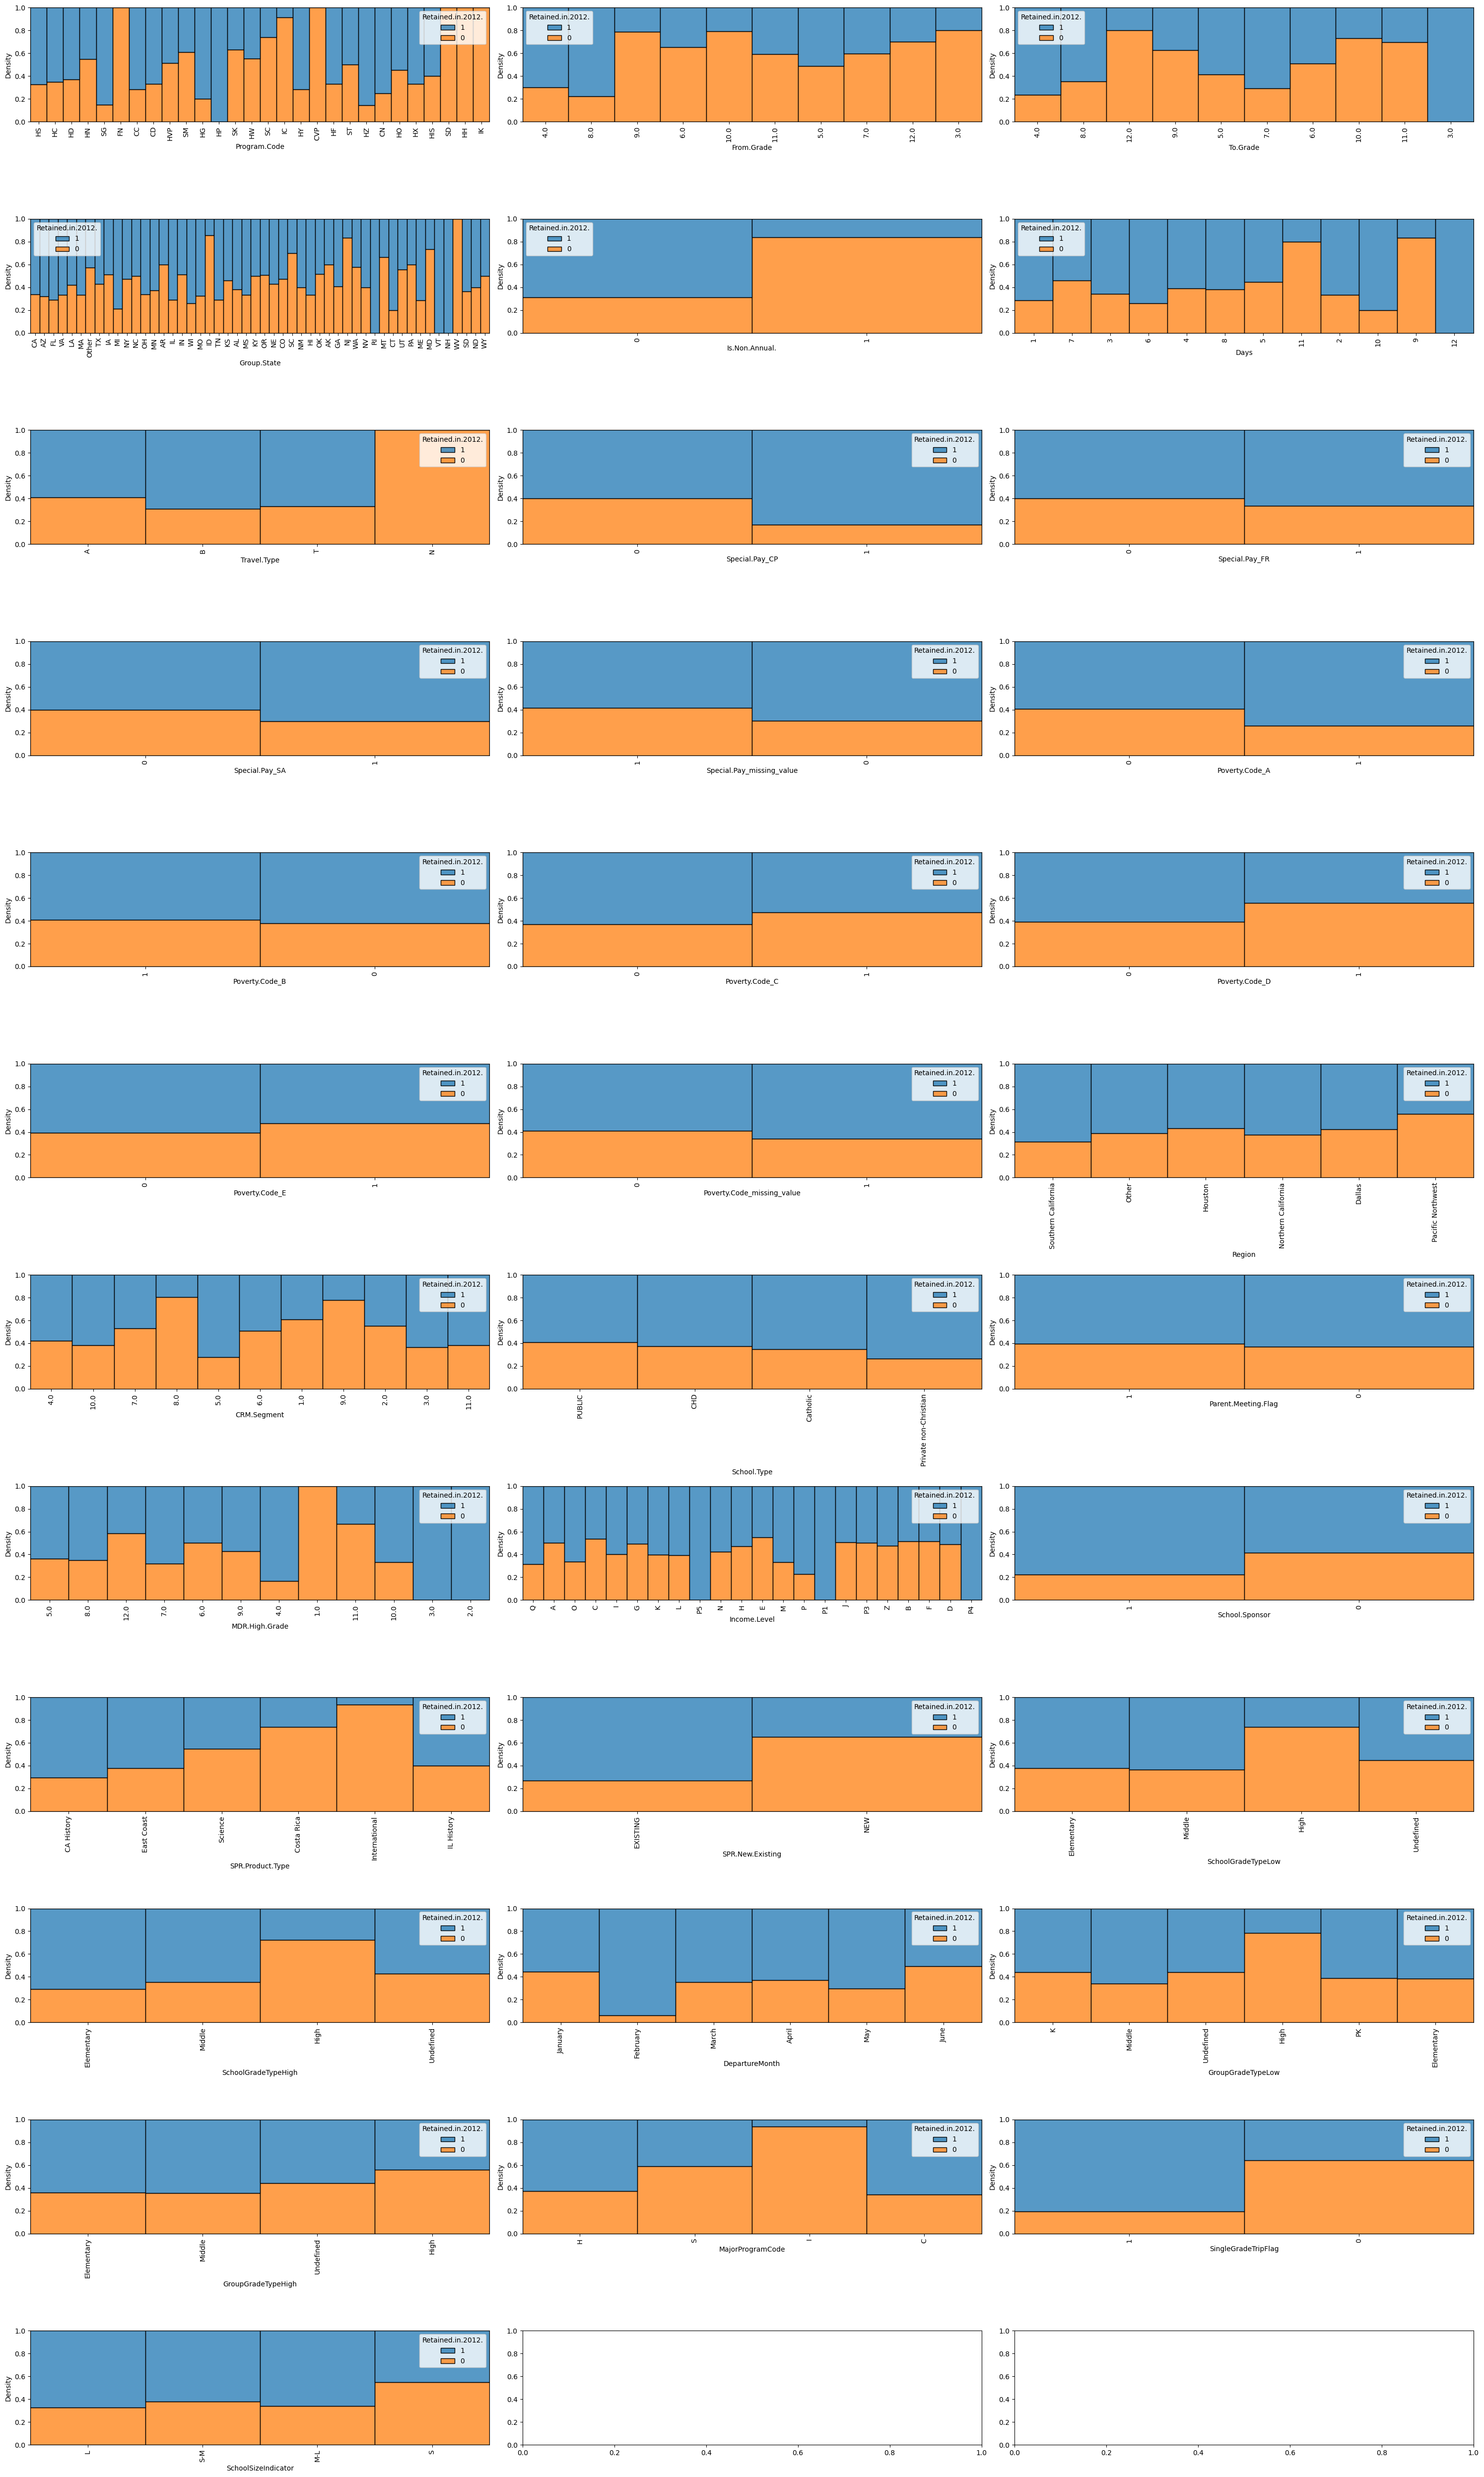

In [68]:
cat_var=['Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Special.Pay_CP','Special.Pay_FR','Special.Pay_SA','Special.Pay_missing_value',
        'Poverty.Code_A','Poverty.Code_B','Poverty.Code_C','Poverty.Code_D','Poverty.Code_E','Poverty.Code_missing_value',
       'Region', 'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag', 'MDR.High.Grade', 'Income.Level', 
         'School.Sponsor','SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'DepartureMonth', 'GroupGradeTypeLow',
       'GroupGradeTypeHigh', 'MajorProgramCode', 'SingleGradeTripFlag',
       'SchoolSizeIndicator'] 
fig,axs=plt.subplots(nrows=12,ncols=3,figsize=(30,50))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Retained.in.2012.', data=df_limpio,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(df_limpio[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

#'MDR.Low.Grade' no grafica por tener letras y num

In [69]:
num_vars = ['Tuition','FRP.Active' ,'FRP.Cancelled','FRP.Take.up.percent.','Cancelled.Pax','Total.Discount.Pax',
            'Total.School.Enrollment','EZ.Pay.Take.Up.Rate','FPP','Total.Pax','SPR.Group.Revenue','NumberOfMeetingswithParents',
            'DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','FPP.to.School.enrollment','FPP.to.PAX',
            'Num.of.Non_FPP.PAX','dias.viaje','dias.desde.depósito','dias.comunicacion','dias.reunion','dias.inicial.depar']


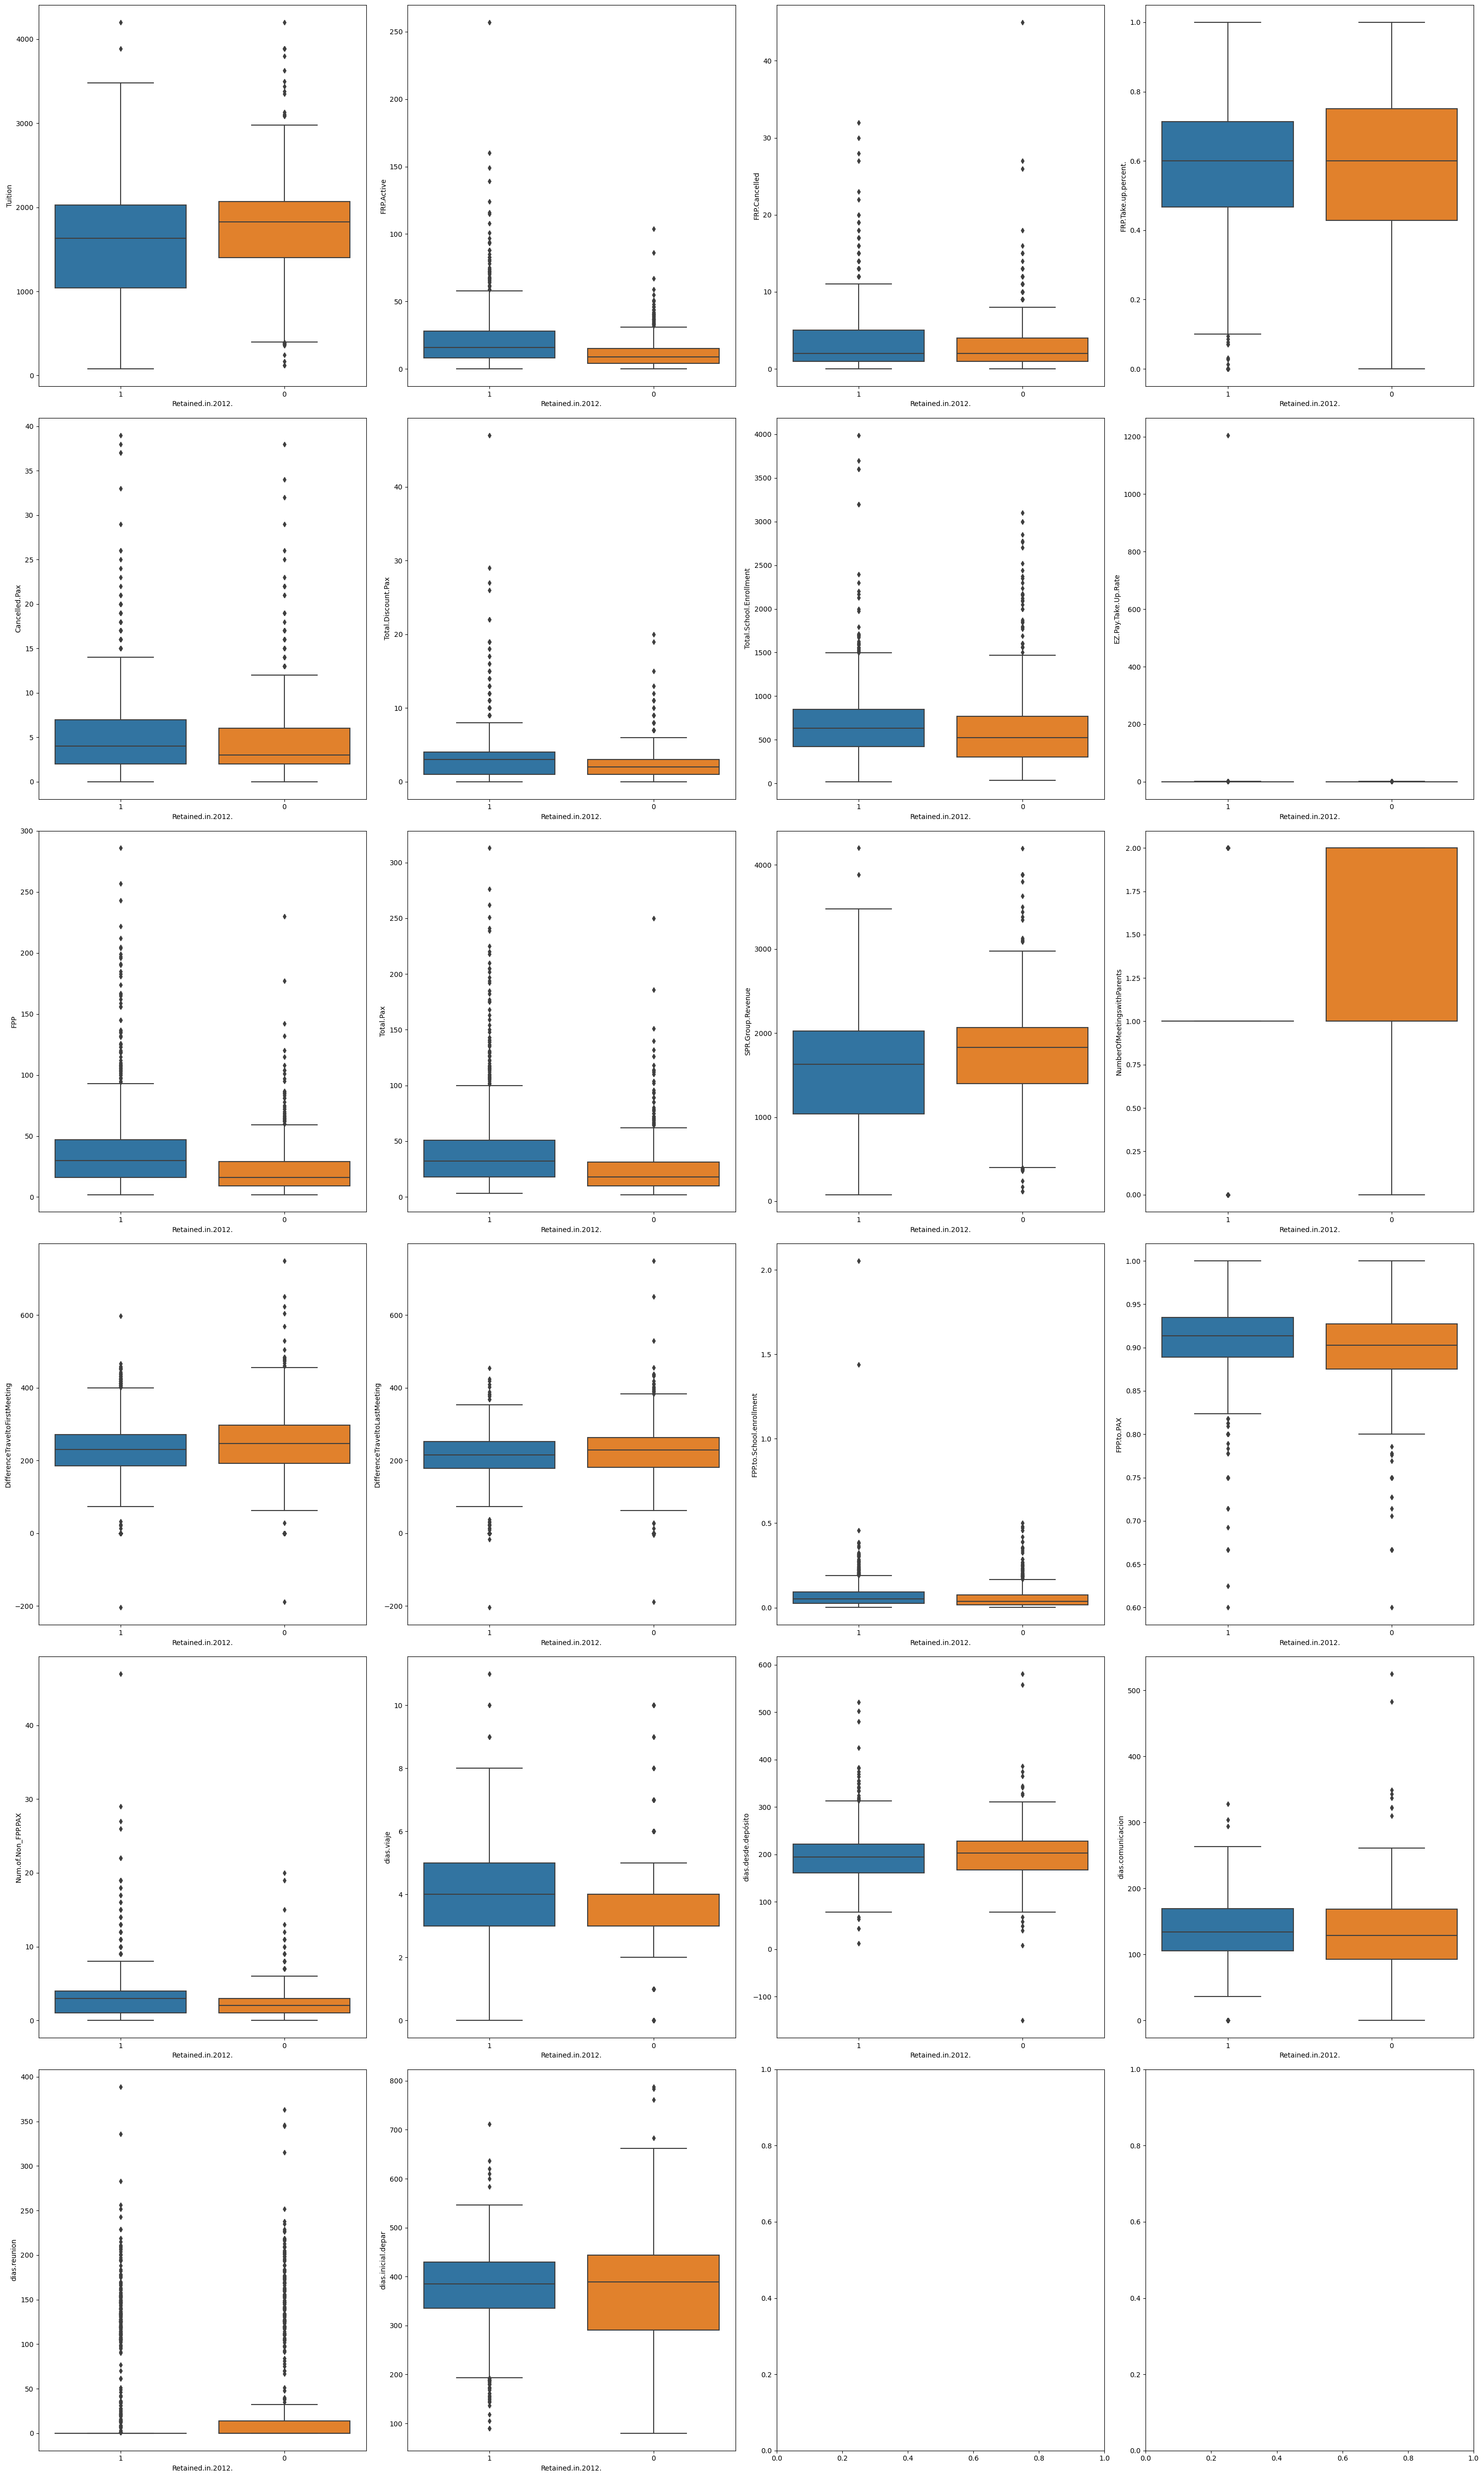

In [70]:
#Z=pd.concat([df_limpio.iloc[: , 28:29], df_num_limpio], axis=1)

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(30, 50))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x='Retained.in.2012.', data=df_limpio, y=var,ax=axs[i])
    
fig.tight_layout()
    
plt.show()

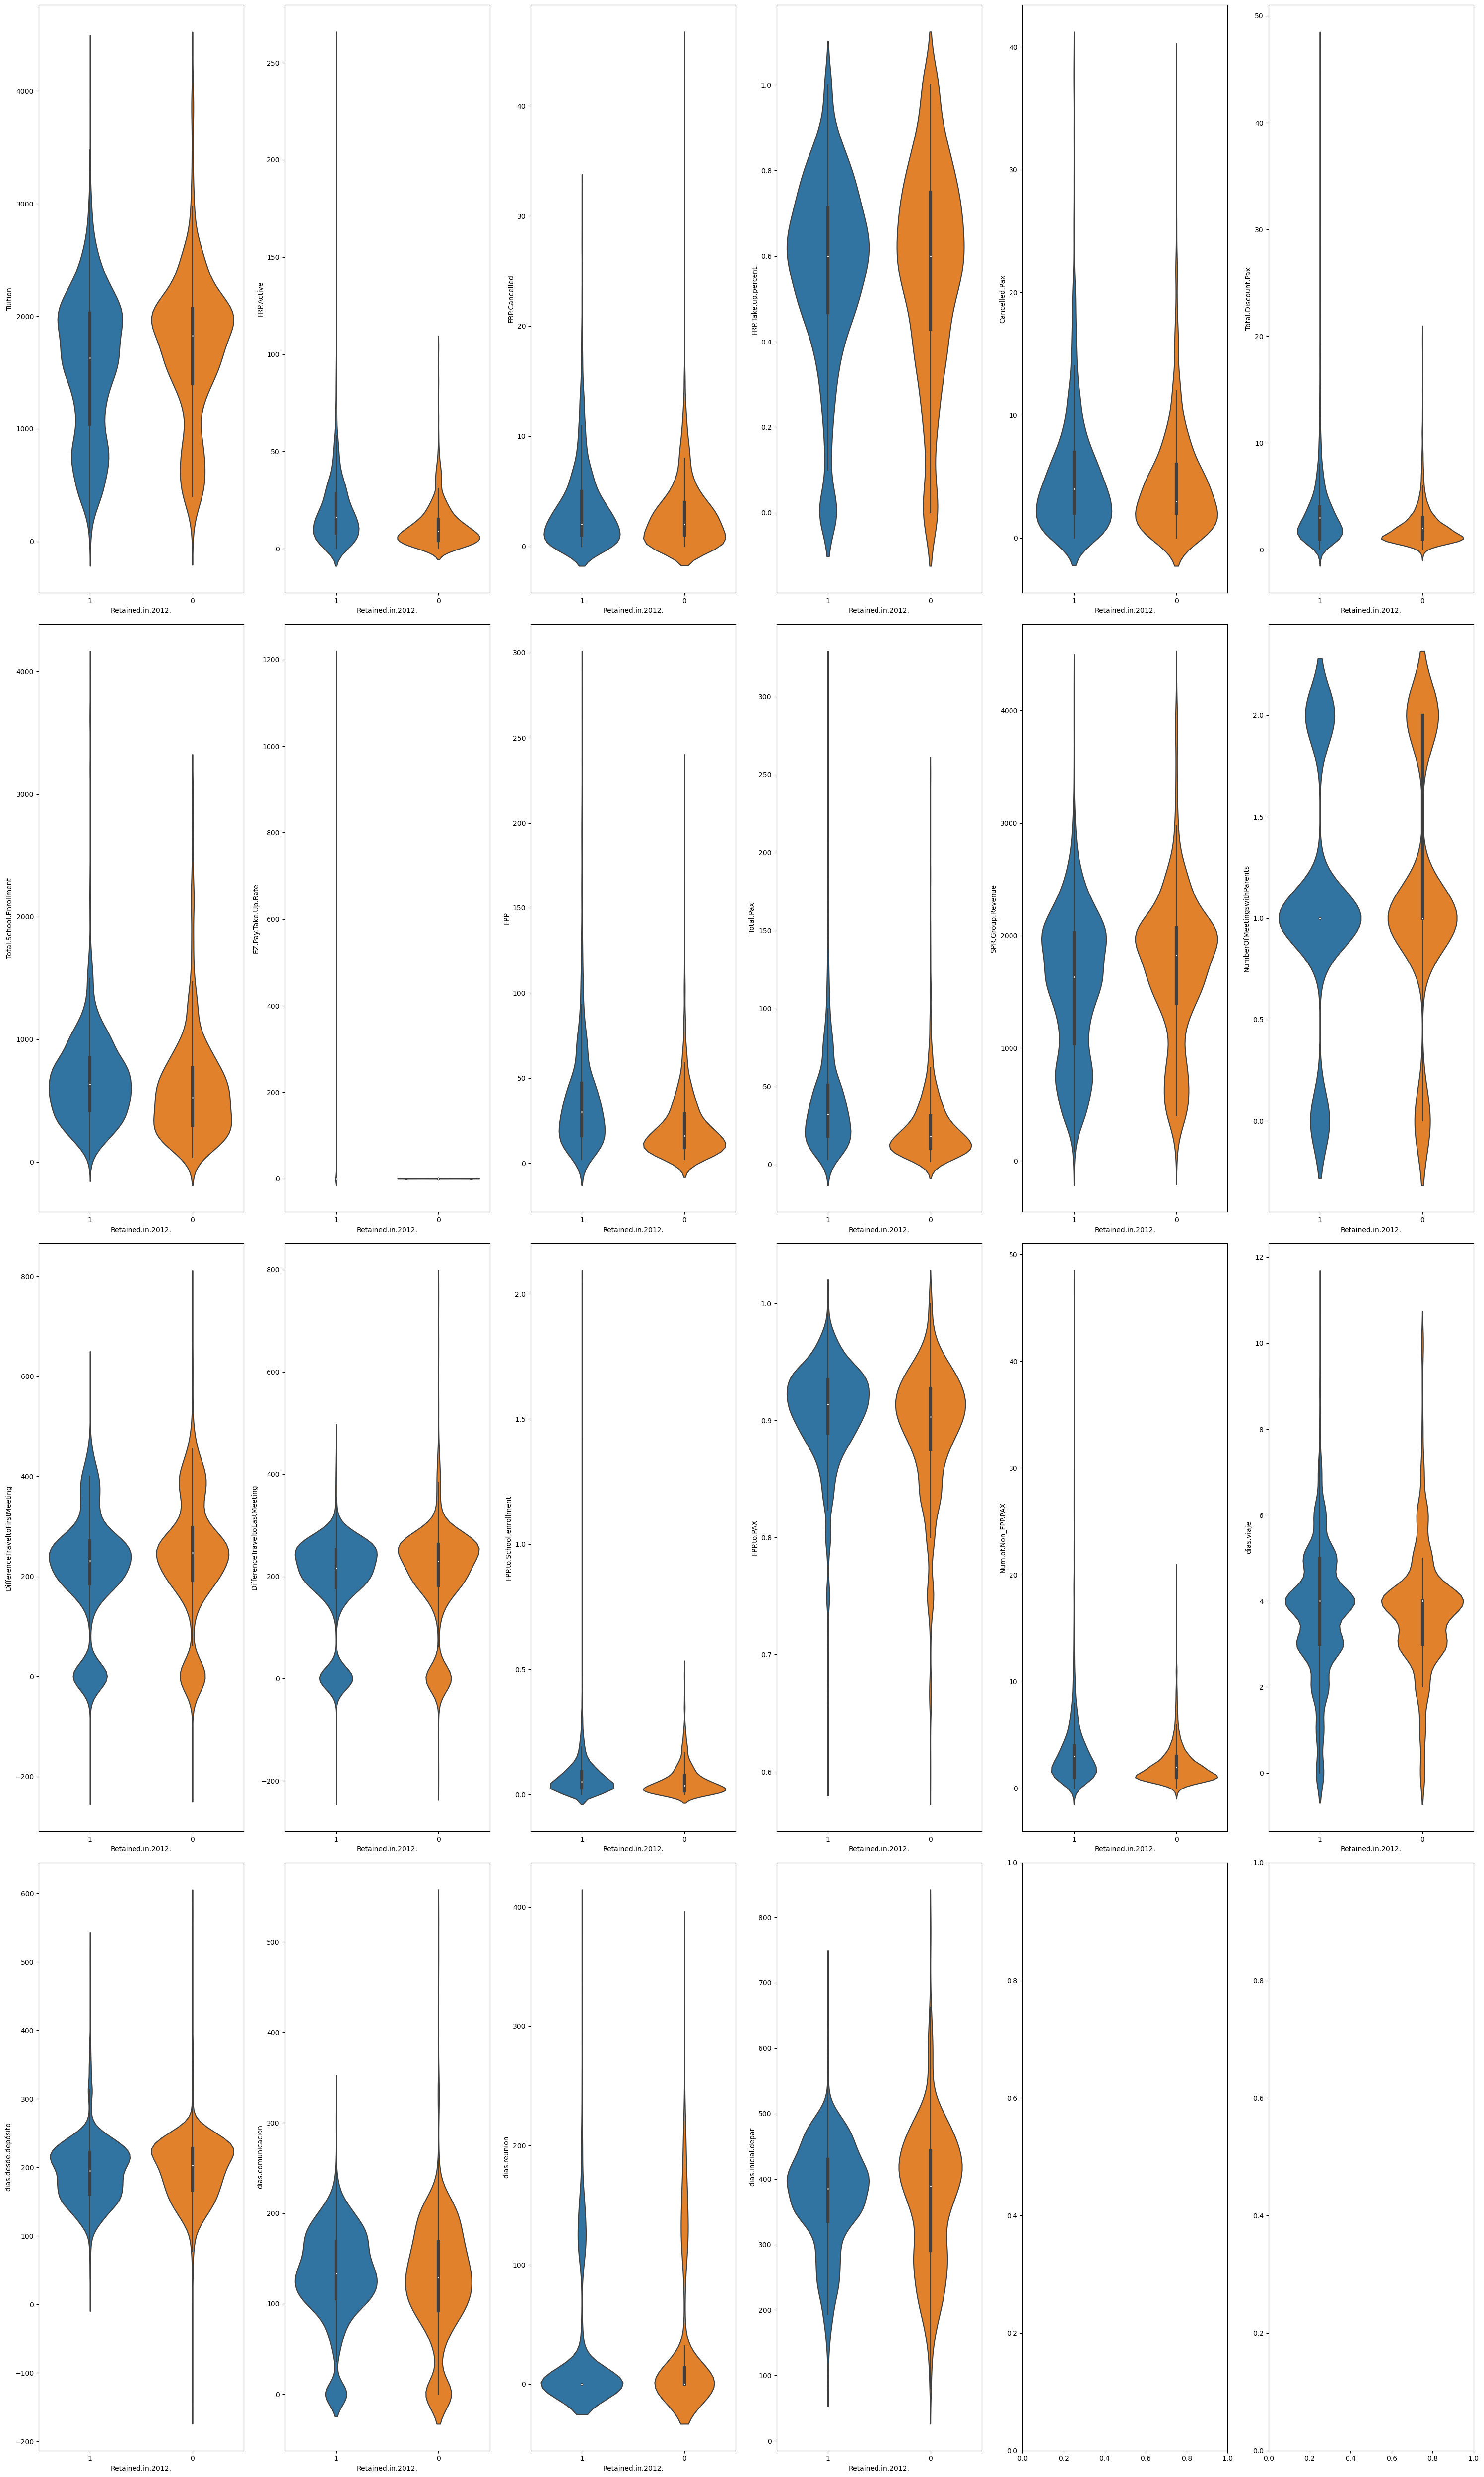

In [71]:

fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(30, 50))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.violinplot(x='Retained.in.2012.', data=df_limpio, y=var, ax=axs[i])
    
fig.tight_layout()
    
plt.show()

Se aplica one hot encoding para transformar variables categoricas a etiquetas numericas. Con esto tendrian una distribucion mas cercana a una normal

In [72]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_limpio['Program.Code']= label_encoder.fit_transform(df_limpio['Program.Code'])
df_limpio['Group.State']= label_encoder.fit_transform(df_limpio['Group.State'])
df_limpio['Travel.Type']= label_encoder.fit_transform(df_limpio['Travel.Type'])
df_limpio['Region']= label_encoder.fit_transform(df_limpio['Region'])
df_limpio['School.Type']= label_encoder.fit_transform(df_limpio['School.Type'])
df_limpio['Income.Level']= label_encoder.fit_transform(df_limpio['Income.Level'])
df_limpio['SPR.Product.Type']= label_encoder.fit_transform(df_limpio['SPR.Product.Type'])
df_limpio['SPR.New.Existing']= label_encoder.fit_transform(df_limpio['SPR.New.Existing'])
df_limpio['SchoolGradeTypeLow']= label_encoder.fit_transform(df_limpio['SchoolGradeTypeLow'])
df_limpio['SchoolGradeTypeHigh']= label_encoder.fit_transform(df_limpio['SchoolGradeTypeHigh'])
df_limpio['DepartureMonth']= label_encoder.fit_transform(df_limpio['DepartureMonth'])
df_limpio['GroupGradeTypeLow']= label_encoder.fit_transform(df_limpio['GroupGradeTypeLow'])
df_limpio['GroupGradeTypeHigh']= label_encoder.fit_transform(df_limpio['GroupGradeTypeHigh'])
df_limpio['MajorProgramCode']= label_encoder.fit_transform(df_limpio['MajorProgramCode'])
df_limpio['SchoolSizeIndicator']= label_encoder.fit_transform(df_limpio['SchoolSizeIndicator'])


#las var que se volvieron string arriba, se vuelven numericas nuevamente para que algortimos los procesen y por graficos de abajo
df_limpio['Is.Non.Annual.'] = df_limpio['Is.Non.Annual.'].astype(int)
df_limpio['CRM.Segment'] = df_limpio['CRM.Segment'].astype(float)
df_limpio['Parent.Meeting.Flag'] = df_limpio['Parent.Meeting.Flag'].astype(int)
df_limpio['MDR.High.Grade'] = df_limpio['MDR.High.Grade'].astype(float)
df_limpio['School.Sponsor'] = df_limpio['School.Sponsor'].astype(int) 
df_limpio['SingleGradeTripFlag'] = df_limpio['SingleGradeTripFlag'].astype(int) 
df_limpio['Retained.in.2012.'] = df_limpio['Retained.in.2012.'].astype(int)
df_limpio['From.Grade'] = df_limpio['From.Grade'].astype(float)
df_limpio['To.Grade'] = df_limpio['To.Grade'].astype(float)
df_limpio['Days'] = df_limpio['Days'].astype(int)
df_limpio['Special.Pay_CP'] = df_limpio['Special.Pay_CP'].astype(int)
df_limpio['Special.Pay_FR'] = df_limpio['Special.Pay_FR'].astype(int)
df_limpio['Special.Pay_SA'] = df_limpio['Special.Pay_SA'].astype(int)
df_limpio['Special.Pay_missing_value'] = df_limpio['Special.Pay_missing_value'].astype(int)
df_limpio['Poverty.Code_A'] = df_limpio['Poverty.Code_A'].astype(int)
df_limpio['Poverty.Code_B'] = df_limpio['Poverty.Code_B'].astype(int)
df_limpio['Poverty.Code_C'] = df_limpio['Poverty.Code_C'].astype(int)
df_limpio['Poverty.Code_D'] = df_limpio['Poverty.Code_D'].astype(int)
df_limpio['Poverty.Code_E'] = df_limpio['Poverty.Code_E'].astype(int)
df_limpio['Poverty.Code_missing_value'] = df_limpio['Poverty.Code_missing_value'].astype(int)

In [73]:
#df_cat_limpio['MDR.Low.Grade']= label_encoder.fit_transform(df_cat_limpio['MDR.Low.Grade'])
#aca sale un error, en todo caso habria que asignar la categoria de forma manual

In [74]:
df_limpio['MDR.Low.Grade'].unique()

array(['K', 7, 6, 10, 9, 'PK', 5, 3, 2, 1, 4, 8], dtype=object)

In [75]:
df_limpio['MDR.Low.Grade'] #antes de la asignacion

0       K
1       7
2       6
3       6
4       6
       ..
2384    6
2385    K
2386    6
2387    6
2388    6
Name: MDR.Low.Grade, Length: 2389, dtype: object

In [76]:
diccionario = {'K': 11, 'PK': 12, 1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:10}
df_limpio['MDR.Low.Grade'] = [diccionario[x] for x in df_limpio['MDR.Low.Grade']] 
#se utiliza comprensión de lista para asignar nuevas categorias

In [77]:
df_limpio['MDR.Low.Grade']#despues de asignacion manual

0       11
1        7
2        6
3        6
4        6
        ..
2384     6
2385    11
2386     6
2387     6
2388     6
Name: MDR.Low.Grade, Length: 2389, dtype: int64

In [78]:
df_limpio.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
0  1            14         4.0       4.0            4               0     1   
1  2             5         8.0       8.0            3               0     7   
2  3             6         8.0       8.0            7               0     3   
3  4            11         9.0      12.0           44               1     3   
4  5             6         6.0       8.0            7               0     6   

   Travel.Type  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
0            0       5          4.0            2                    1   
1            0       3         10.0            2                    1   
2            0       3         10.0            2                    1   
3            1       3          7.0            0                    0   
4            3       3         10.0            2                    1   

   MDR.Low.Grade  MDR.High.Grade  Income.Level  School.Sponsor  \
0             11             5.0            20               1   
1              7             8.0             0               0   
2              6             8.0            14               0   
3              6             8.0            20               0   
4              6             8.0             2               0   

   SPR.Product.Type  SPR.New.Existing  SchoolGradeTypeLow  \
0                 0                 0                   0   
1                 2                 0                   2   
2                 2                 0                   2   
3                 2                 0                   1   
4                 2                 0                   2   

   SchoolGradeTypeHigh  DepartureMonth  GroupGradeTypeLow  GroupGradeTypeHigh  \
0                    0               2                  2                   0   
1                    2               2                  3                   2   
2                    2               2                  3                   2   
3                    1               2                  5                   3   
4                    2               2                  3                   2   

   MajorProgramCode  SingleGradeTripFlag  SchoolSizeIndicator  \
0                 1                    1                    0   
1                 1                    1                    0   
2                 1                    1                    0   
3                 1                    0                    3   
4                 1                    0                    1   

   Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  Special.Pay_SA  \
0                  1               0               0               0   
1                  1               1               0               0   
2                  1               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   

   Special.Pay_missing_value  Poverty.Code_A  Poverty.Code_B  Poverty.Code_C  \
0                          1               0               1               0   
1                          0               0               0               1   
2                          1               0               0               1   
3                          1               0               0               0   
4                          1               0               0               0   

   Poverty.Code_D  Poverty.Code_E  Poverty.Code_missing_value  Tuition  \
0               0               0                           0    424.0   
1               0               0                           0   2350.0   
2               0               0                           0   1181.0   
3               0               0                           1    376.0   
4               1               0                           0    865.0   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  \
0        25.0     

Balancear las etiquetas:

1    1451
0     938
Name: Retained.in.2012., dtype: int64

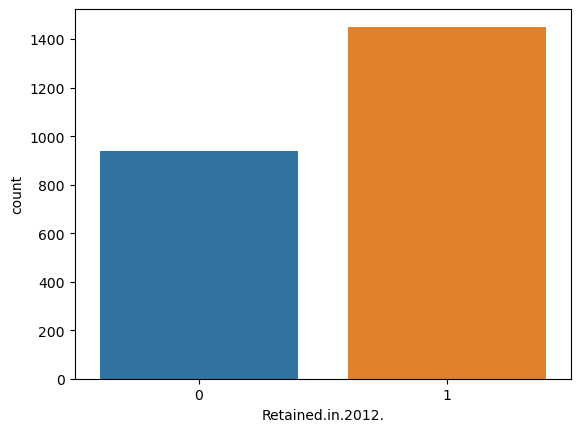

In [79]:
sns.countplot(df_limpio['Retained.in.2012.'])
df_limpio['Retained.in.2012.'].value_counts()

In [80]:
from sklearn.utils import resample

df_majority=df_limpio[(df_limpio['Retained.in.2012.']==1)] 
df_minority=df_limpio[(df_limpio['Retained.in.2012.']==0)]

# muestreo ascendente de la clase minoritaria
df_minority_unsampled=resample(df_minority, 
                              replace=True, 
                              n_samples=1451, 
                              random_state=0) 

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled=pd.concat([df_minority_unsampled,df_majority]) #junta tablas
df_upsampled.head()

ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  \
1905  1906            11         7.0       8.0           42               0   
1631  1632             6         8.0       8.0           42               0   
1780  1781             6         6.0       8.0           21               0   
567    568             6        10.0      12.0           17               0   
2214  2215             6         6.0       8.0           46               1   

      Days  Travel.Type  Region  CRM.Segment  School.Type  \
1905     4            0       0         10.0            2   
1631     4            0       0         10.0            2   
1780     4            0       3         10.0            2   
567      4            1       3          2.0            2   
2214     5            0       4          5.0            2   

      Parent.Meeting.Flag  MDR.Low.Grade  MDR.High.Grade  Income.Level  \
1905                    1              7             8.0            10   
1631                    1              6            12.0            11   
1780                    1              3            10.0            10   
567                     1              8            12.0             6   
2214                    1              6             8.0             5   

      School.Sponsor  SPR.Product.Type  SPR.New.Existing  SchoolGradeTypeLow  \
1905               0                 2                 0                   2   
1631               0                 2                 1                   2   
1780               0                 2                 1                   2   
567                0                 2                 1                   1   
2214               0                 2                 1                   2   

      SchoolGradeTypeHigh  DepartureMonth  GroupGradeTypeLow  \
1905                    2               3                  3   
1631                    2               3                  3   
1780                    2               3                  0   
567                     1               0                  3   
2214                    2               3                  3   

      GroupGradeTypeHigh  MajorProgramCode  SingleGradeTripFlag  \
1905                   2                 1                    0   
1631                   1                 1                    1   
1780                   1                 1                    0   
567                    1                 1                    0   
2214                   2                 1                    0   

      SchoolSizeIndicator  Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  \
1905                    3                  0               0               0   
1631                    3                  0               0               0   
1780                    2                  0               0               0   
567                     0                  0               0               0   
2214                    2                  0               0               0   

      Special.Pay_SA  Special.Pay_missing_value  Poverty.Code_A  \
1905               0                          1               0   
1631               0                          1               0   
1780               0                          1               0   
567                0                          1               0   
2214               0                          1               0   

      Poverty.Code_B  Poverty.Code_C  Poverty.Code_D  Poverty.Code_E  \
1905               0               1               0               0   
1631               1               0               0               0   
1780               0               1               0               0   
567                1               0               0               0   
2214               0               1               0               0   

      Poverty.Code_missing_value  Tuition  FRP.Active  FRP.Cancelled  \
1905                           0   2157.0        13.0          

0    1451
1    1451
Name: Retained.in.2012., dtype: int64

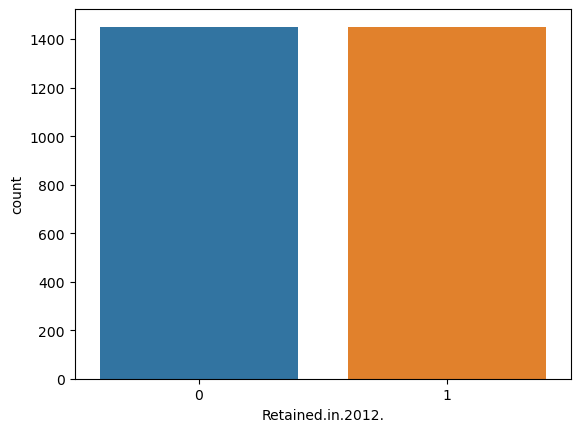

In [81]:
#despues del balanceo
sns.countplot(df_upsampled['Retained.in.2012.'])
df_upsampled['Retained.in.2012.'].value_counts()

In [82]:
df_upsampled.shape

(2902, 59)

Eliminar outliers de var numericas usando IQR

In [83]:

def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = num_vars

# Solicitar la función que remueve los outliers usando IQR
df_limpio = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df_limpio.head()


ID  Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  \
2066  2067             6         5.0       6.0           42               0   
807    808             6         6.0       8.0           46               1   
1472  1473             6         8.0       8.0            4               0   
300    301             6         5.0       5.0            4               0   
1888  1889             6         7.0       8.0            5               1   

      Days  Travel.Type  Region  CRM.Segment  School.Type  \
2066     3            0       0          4.0            2   
807      6            0       4         10.0            2   
1472     5            0       2         10.0            1   
300      5            0       5          4.0            2   
1888     5            0       3          5.0            2   

      Parent.Meeting.Flag  MDR.Low.Grade  MDR.High.Grade  Income.Level  \
2066                    1             12             6.0            13   
807                     1              7            12.0             5   
1472                    1             11             8.0            11   
300                     1             11             5.0            10   
1888                    1              7            12.0            13   

      School.Sponsor  SPR.Product.Type  SPR.New.Existing  SchoolGradeTypeLow  \
2066               0                 2                 1                   0   
807                0                 2                 0                   2   
1472               0                 2                 1                   3   
300                0                 2                 0                   0   
1888               0                 2                 0                   2   

      SchoolGradeTypeHigh  DepartureMonth  GroupGradeTypeLow  \
2066                    2               3                  4   
807                     2               0                  3   
1472                    3               5                  2   
300                     0               4                  2   
1888                    2               3                  3   

      GroupGradeTypeHigh  MajorProgramCode  SingleGradeTripFlag  \
2066                   2                 1                    0   
807                    1                 1                    0   
1472                   2                 1                    0   
300                    0                 1                    1   
1888                   1                 1                    0   

      SchoolSizeIndicator  Retained.in.2012.  Special.Pay_CP  Special.Pay_FR  \
2066                    1                  0               0               0   
807                     2                  0               0               0   
1472                    2                  0               0               0   
300                     0                  0               0               1   
1888                    2                  0               0               1   

      Special.Pay_SA  Special.Pay_missing_value  Poverty.Code_A  \
2066               0                          1               0   
807                0                          1               0   
1472               0                          1               0   
300                0                          0               0   
1888               0                          0               0   

      Poverty.Code_B  Poverty.Code_C  Poverty.Code_D  Poverty.Code_E  \
2066               1               0               0               0   
807                0               1               0               0   
1472               0               0               0               0   
300                0               1               0               0   
1888               1               0               0               0   

      Poverty.Code_missing_value  Tuition  FRP.Active  FRP.Cancelled  \
2066                           0   1459.0         5.0          

In [84]:
df_limpio.describe()


Program.Code  From.Grade    To.Grade  Group.State  Is.Non.Annual.  \
count    930.000000  930.000000  930.000000   930.000000      930.000000   
mean       7.744086    7.366667    8.060215    21.720430        0.197849   
std        5.898413    1.012285    1.032636    16.452931        0.398592   
min        0.000000    4.000000    4.000000     1.000000        0.000000   
25%        6.000000    7.000000    8.000000     4.000000        0.000000   
50%        6.000000    8.000000    8.000000    20.000000        0.000000   
75%        6.000000    8.000000    8.000000    41.000000        0.000000   
max       27.000000   12.000000   12.000000    49.000000        1.000000   

             Days  Travel.Type      Region  CRM.Segment  School.Type  \
count  930.000000   930.000000  930.000000   930.000000   930.000000   
mean     4.552688     0.116129    2.845161     7.364516     1.805376   
std      0.831251     0.367487    1.231845     2.641767     0.630899   
min      3.000000     0.000000    0.000000     1.000000     0.000000   
25%      4.000000     0.000000    2.000000     5.000000     2.000000   
50%      5.000000     0.000000    3.000000     7.000000     2.000000   
75%      5.000000     0.000000    3.000000    10.000000     2.000000   
max      6.000000     3.000000    5.000000    10.000000     3.000000   

       Parent.Meeting.Flag  MDR.Low.Grade  MDR.High.Grade  Income.Level  \
count                930.0     930.000000      930.000000    930.000000   
mean                   1.0       7.889247        8.337634     10.863441   
std                    0.0       2.614770        1.610642      4.988216   
min                    1.0       1.000000        3.000000      0.000000   
25%                    1.0       6.000000        8.000000      8.000000   
50%                    1.0       7.000000        8.000000     11.000000   
75%                    1.0      11.000000        8.000000     14.000000   
max                    1.0      12.000000       12.000000     21.000000   

       School.Sponsor  SPR.Product.Type  SPR.New.Existing  SchoolGradeTypeLow  \
count      930.000000        930.000000        930.000000          930.000000   
mean         0.047312          2.251613          0.327957            1.904301   
std          0.212419          0.851215          0.469722            0.557253   
min          0.000000          0.000000          0.000000            0.000000   
25%          0.000000          2.000000          0.000000            2.000000   
50%          0.000000          2.000000          0.000000            2.000000   
75%          0.000000          2.000000          1.000000            2.000000   
max          1.000000          5.000000          1.000000            3.000000   

       SchoolGradeTypeHigh  DepartureMonth  GroupGradeTypeLow  \
count           930.000000      930.000000         930.000000   
mean              1.922581        2.833333           2.737634   
std               0.512939        1.680371           1.031257   
min               0.000000        0.000000           0.000000   
25%               2.000000        3.000000           2.000000   
50%               2.000000        3.000000           3.000000   
75%               2.000000        4.000000           3.000000   
max               3.000000        5.000000           5.000000   

       GroupGradeTypeHigh  MajorProgramCode  SingleGradeTripFlag  \
count          930.000000        930.000000           930.000000   
mean             1.766667          1.121505             0.501075   
std              0.537473          0.616660             0.500268   
min              0.000000          0.000000             0.000000   
25%              2.000000          1.000000             0.000000   
50%              2.000000          1.000000             1.000000   
75%              2.000000          1.000000             1.000000   
max              3.000000          3.000000             1.000000   

       SchoolSizeIndicator  Retained.in.2012.  Special.Pay_CP  Speci

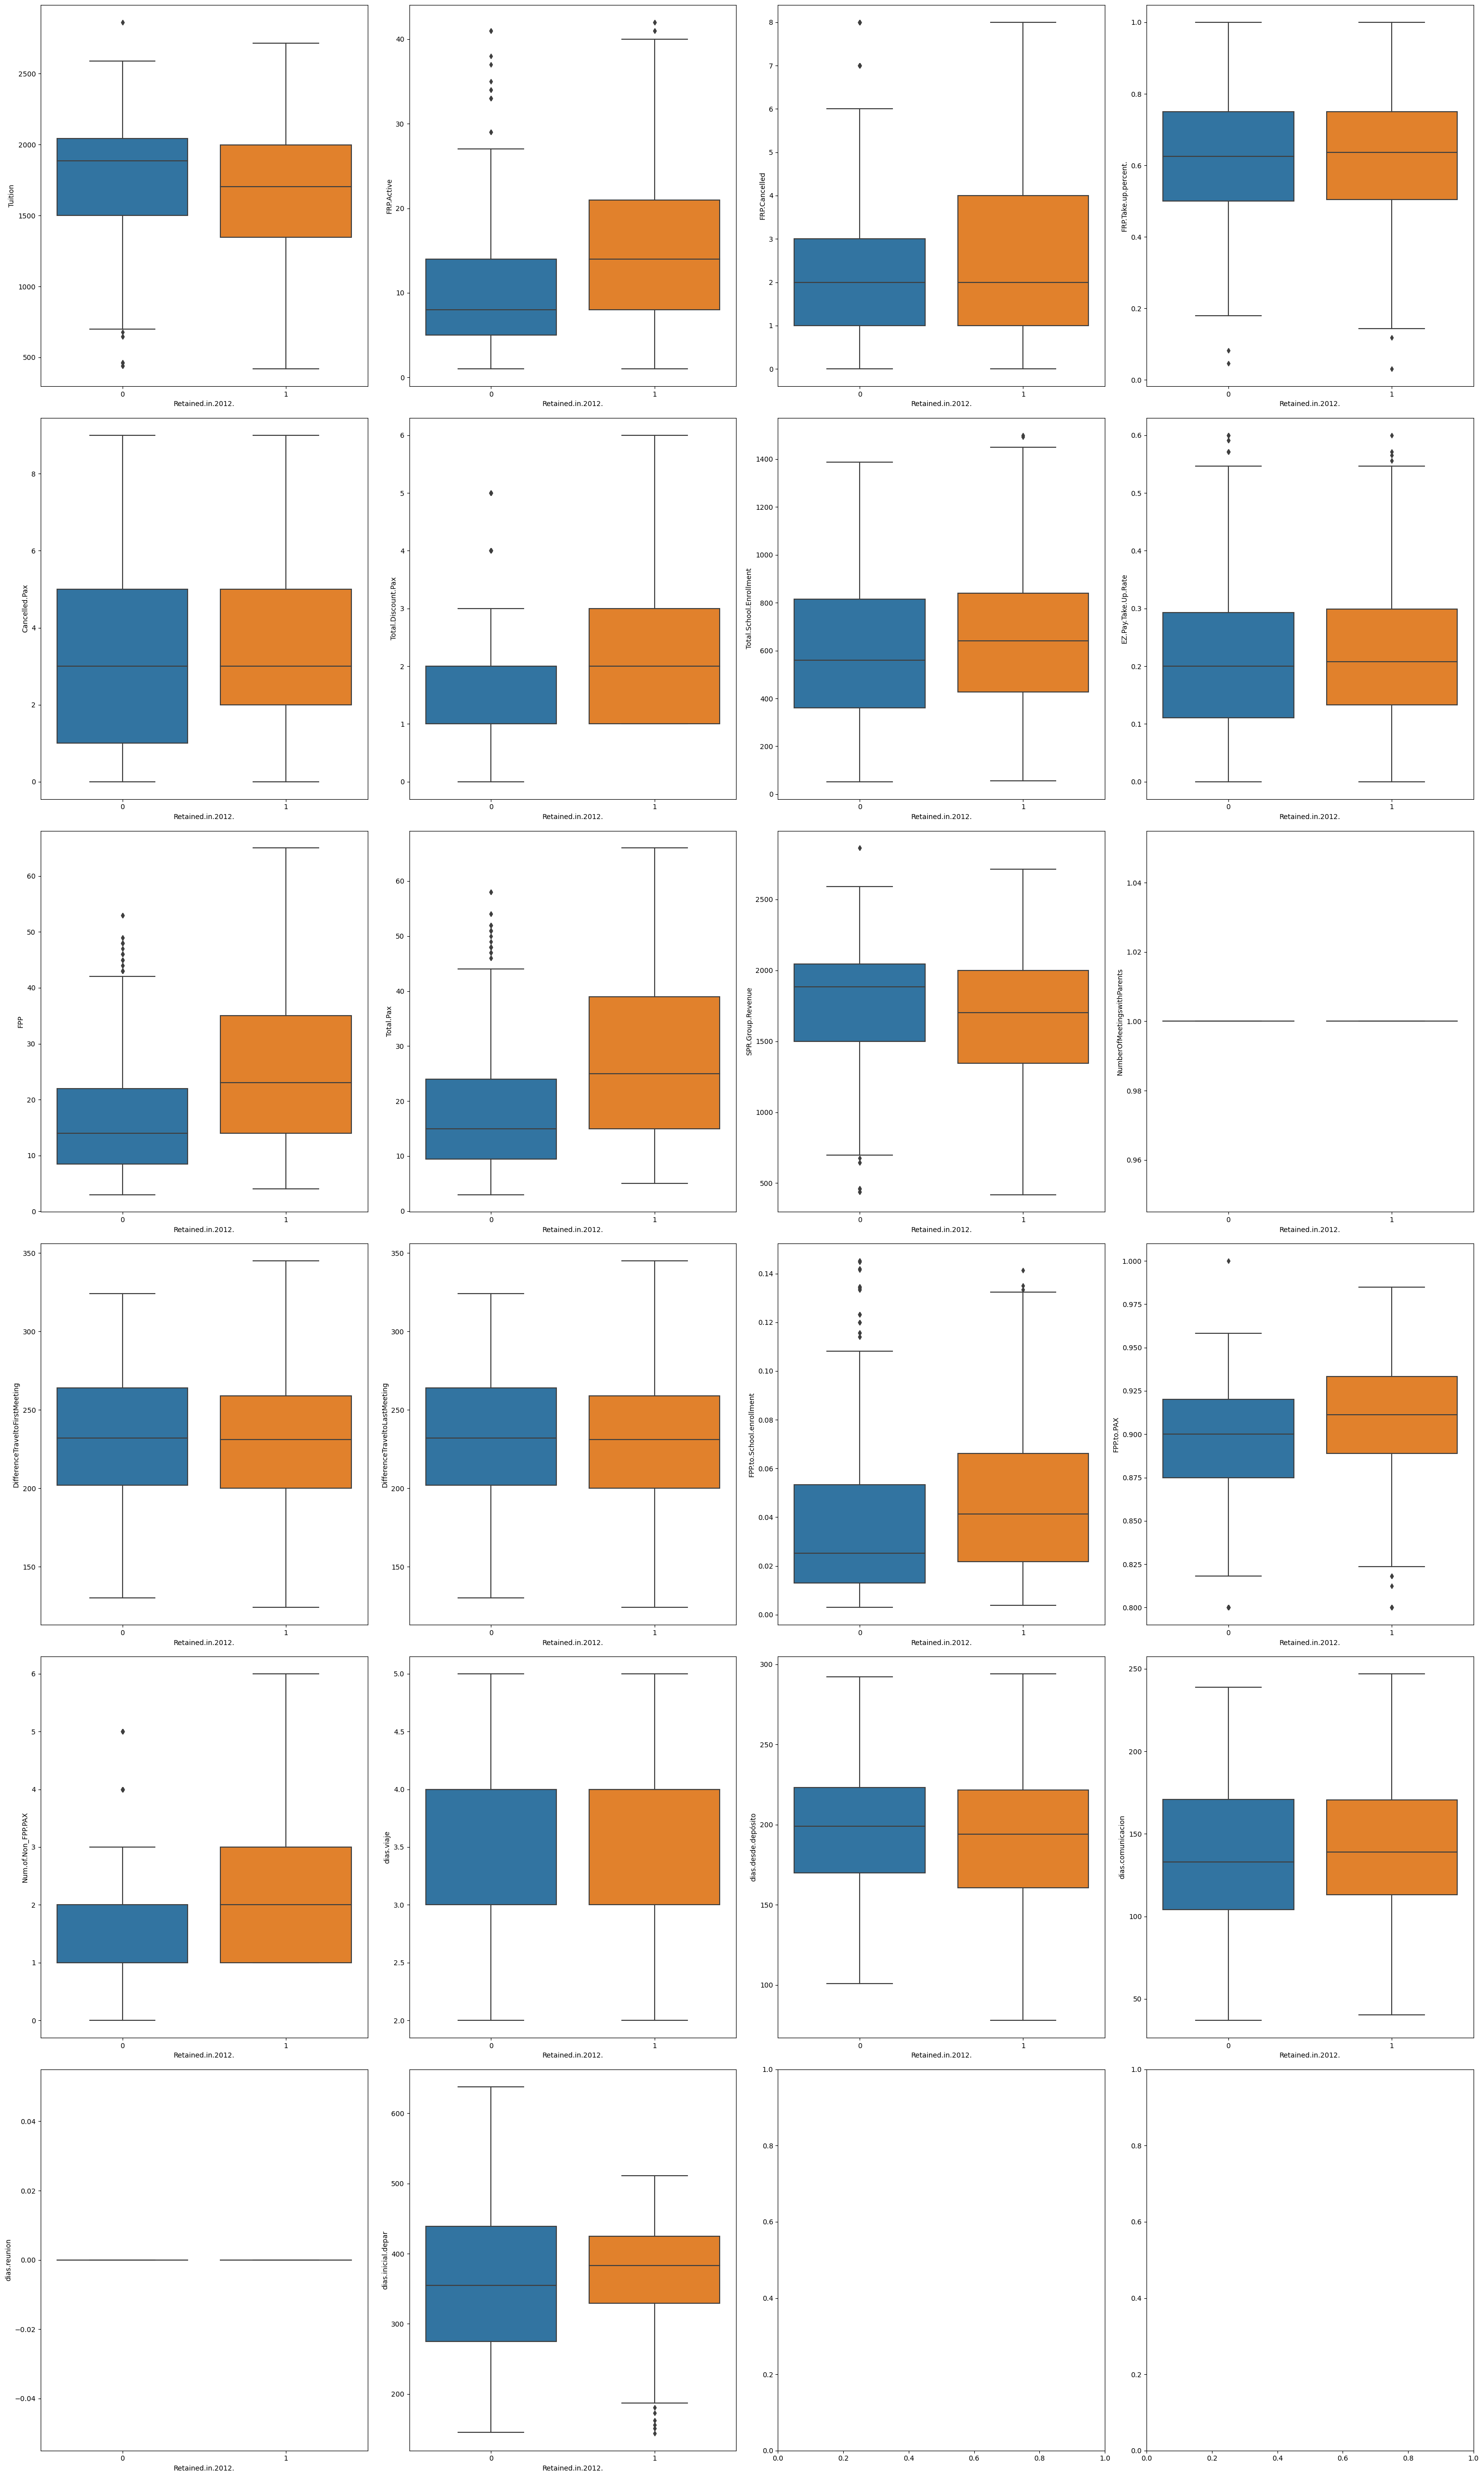

In [85]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(30, 50))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x='Retained.in.2012.', data=df_limpio, y=var,ax=axs[i])
    
fig.tight_layout()
    
plt.show()
#se ven las var numericas sin outliers

In [86]:
#con var elegidas de decision tree, datos ya estan con onehot encoding, con balanceo, quitando outliers y limpios
df_randomForest=df_limpio[["Is.Non.Annual.","SingleGradeTripFlag", "FPP",'Total.Pax',  "dias.inicial.depar","FPP.to.School.enrollment",
                          'From.Grade', "FRP.Active",'Tuition', "dias.comunicacion",'Retained.in.2012.']]

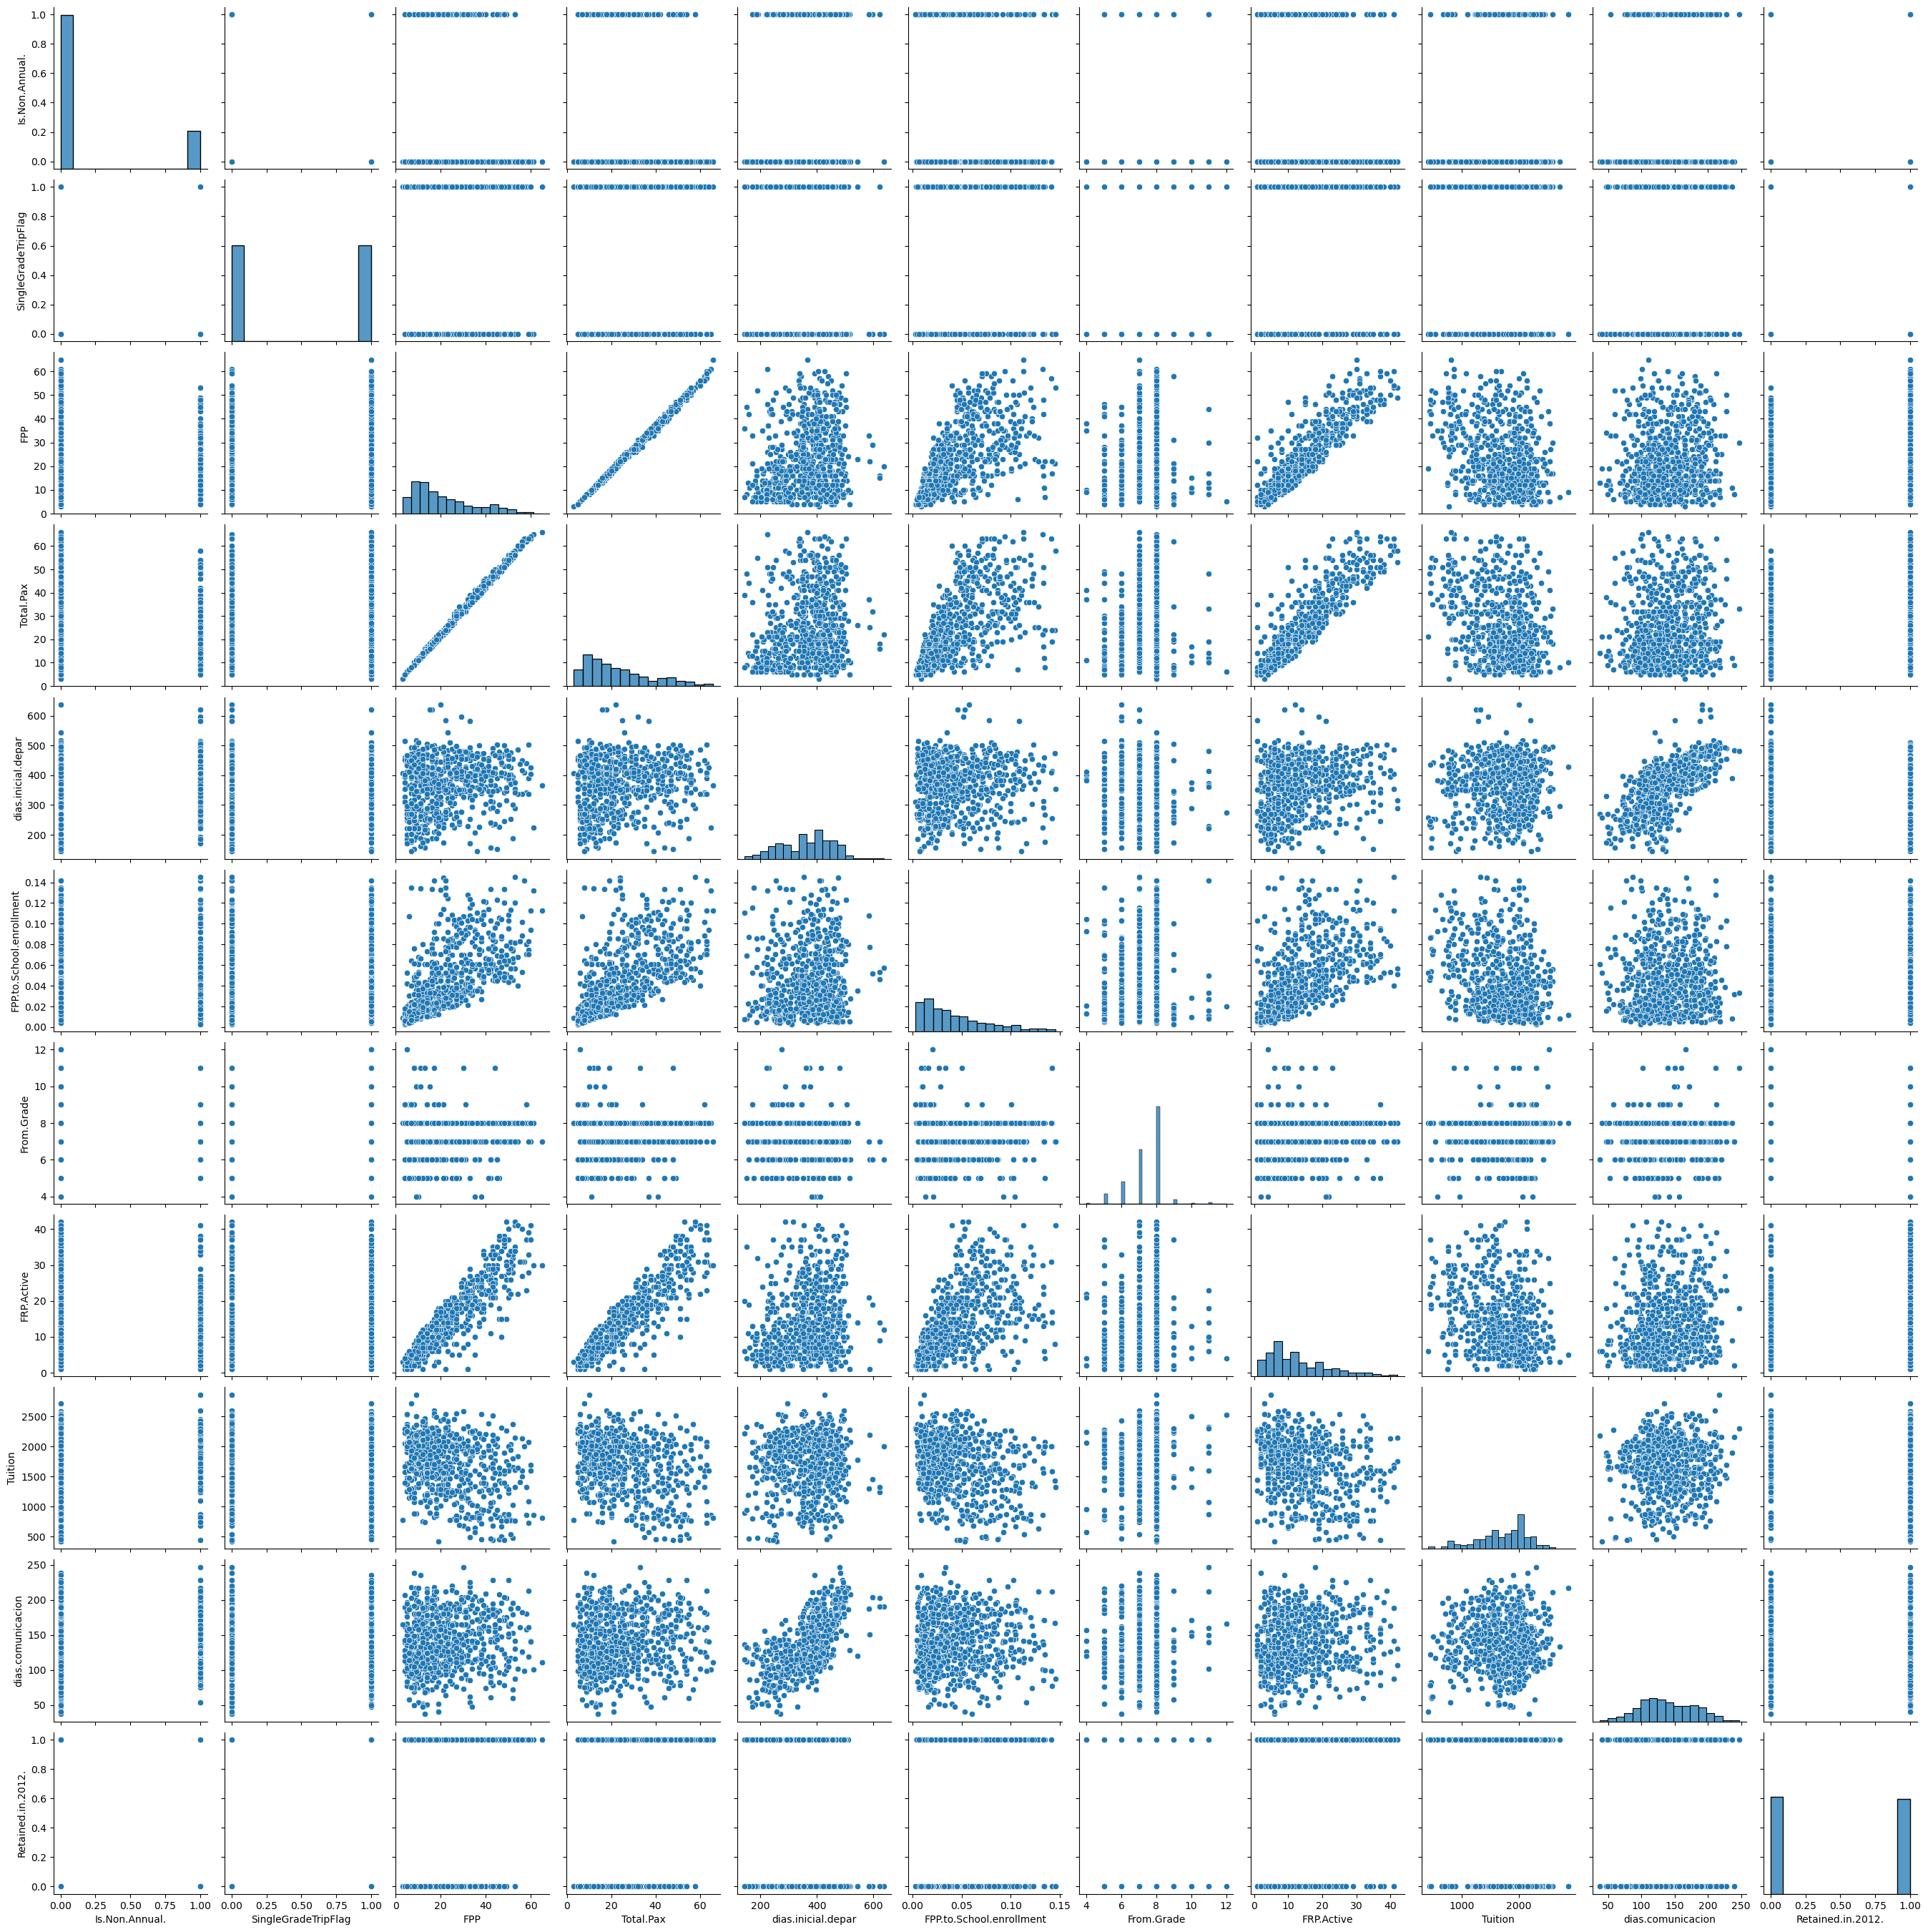

In [87]:
df_randomForest = df_randomForest.reset_index(drop=True)
sns.pairplot(df_randomForest)

Correlación mostrando un heatmap

<AxesSubplot:>

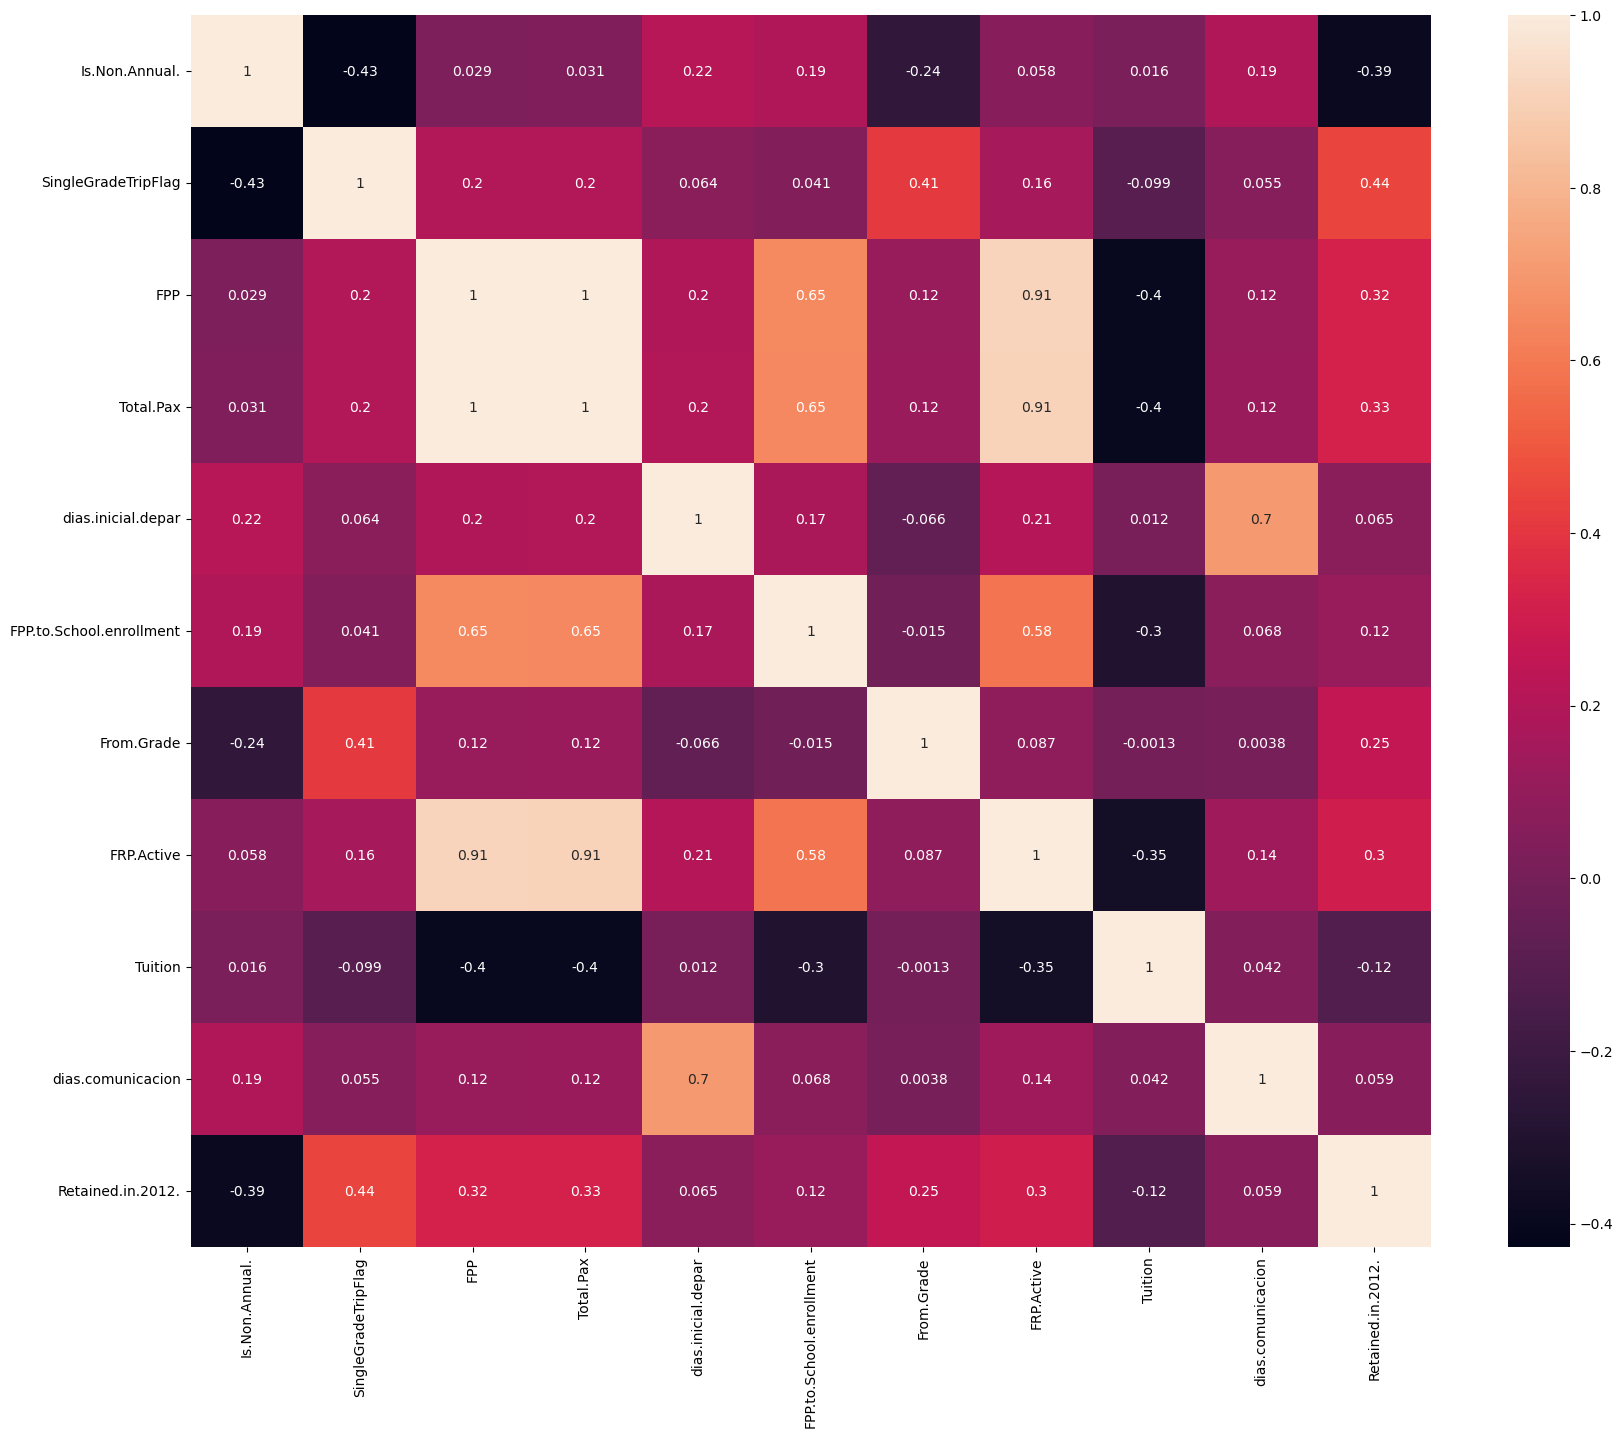

In [88]:

# seria un matriz con onehot encoding, con balanceo, quitando outliers y limpios
plt.figure(figsize=(20, 16))
sns.heatmap(df_randomForest.corr(), 
            fmt='.2g', annot=True
           )
#No se evidencias correlaciones altas entre var dependiente e independientes

# RANDOM FOREST

In [89]:
#se utiliza la base completa para determinar las var mas importantes
X = df_limpio.drop(['Retained.in.2012.','ID'], axis=1)  
y = df_limpio['Retained.in.2012.']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [91]:
from sklearn.ensemble import RandomForestClassifier

Modelo Random Forest con n_estimators = 10 (por defecto)

In [92]:
rfc = RandomForestClassifier(random_state=0) 
rfc.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [93]:
y_pred = rfc.predict(X_test)

In [94]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))


Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.82


Modelo Random Forest con n_estimators = 100

In [95]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [96]:
y_pred_100 = rfc_100.predict(X_test)

In [97]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.82


In [98]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.8207885304659498
Precision Score :  0.8207885304659498
Recall Score :  0.8207885304659498
Jaccard Score :  0.6960486322188449


In [99]:
print (classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       140
           1       0.86      0.76      0.81       139

    accuracy                           0.82       279
   macro avg       0.83      0.82      0.82       279
weighted avg       0.82      0.82      0.82       279



<Figure size 900x900 with 0 Axes>

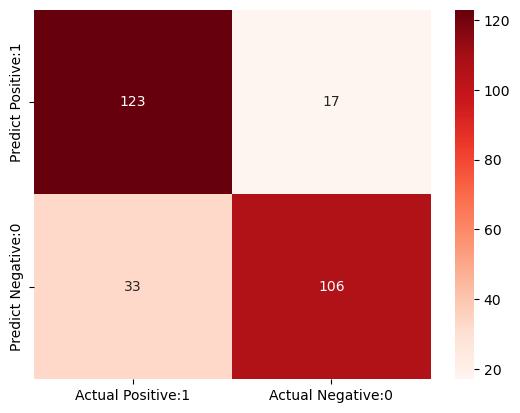

<Figure size 900x900 with 0 Axes>

In [100]:
cm = confusion_matrix(y_test, y_pred_100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [101]:
y_pred_prob = rfc_100.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

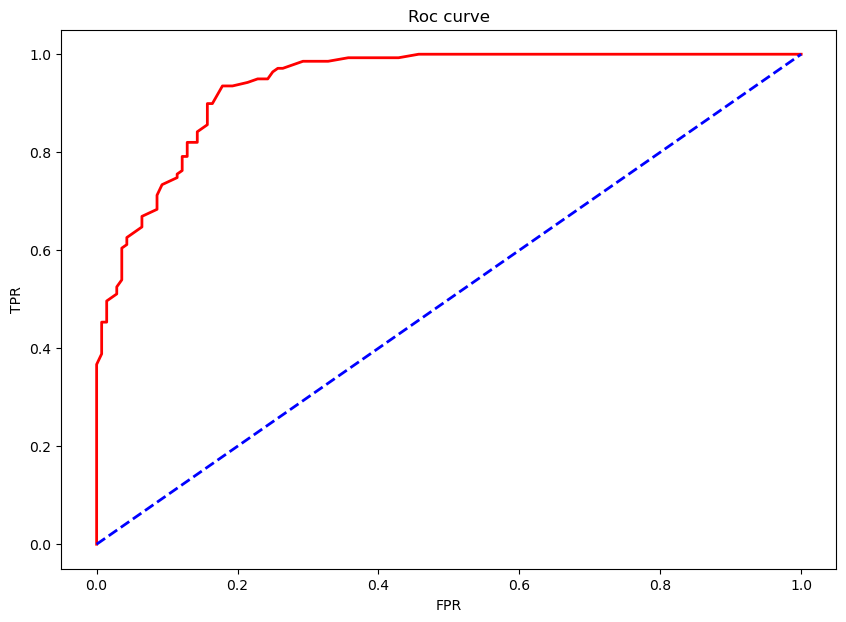

In [102]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [103]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

feature_scores

Is.Non.Annual.              0.062777
SingleGradeTripFlag         0.060942
FPP                         0.051947
Total.Pax                   0.049510
dias.inicial.depar          0.044559
FPP.to.School.enrollment    0.041118
From.Grade                  0.041111
FRP.Active                  0.037938
Tuition                     0.036383
dias.comunicacion           0.033992
dtype: float64

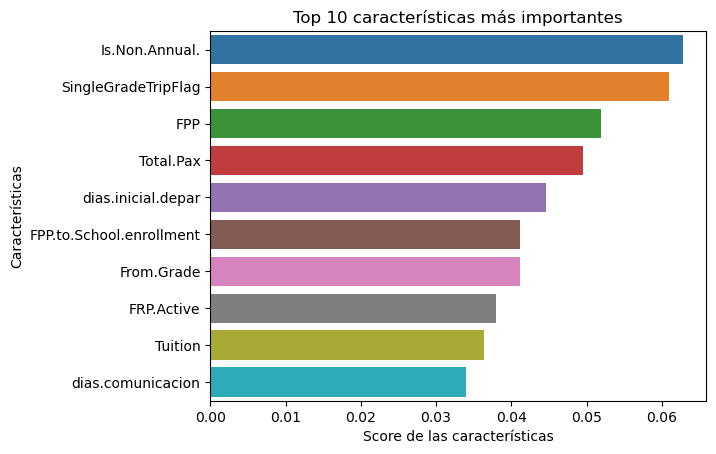

In [104]:
#Graficar las características
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico 

plt.xlabel('Score de las características')

plt.ylabel('Características')

# Agregamos título al gráfico

plt.title("Top 10 características más importantes")

plt.show()


# DECISION TREE

Definiendo vector de características (X) y variable target (y)

In [105]:
X = df_randomForest.drop(['Retained.in.2012.'], axis=1) 
y = df_randomForest['Retained.in.2012.']

Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [107]:
X_train.shape

(651, 10)

Hacemos predicción con CLF Gini:

In [108]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [109]:
y_pred_gini = clf_gini.predict(X_test)

In [110]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.77


In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.7706093189964157
Precision Score :  0.7706093189964157
Recall Score :  0.7706093189964157
Jaccard Score :  0.6268221574344023


In [112]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       140
           1       0.91      0.60      0.72       139

    accuracy                           0.77       279
   macro avg       0.81      0.77      0.76       279
weighted avg       0.81      0.77      0.76       279



<Figure size 900x900 with 0 Axes>

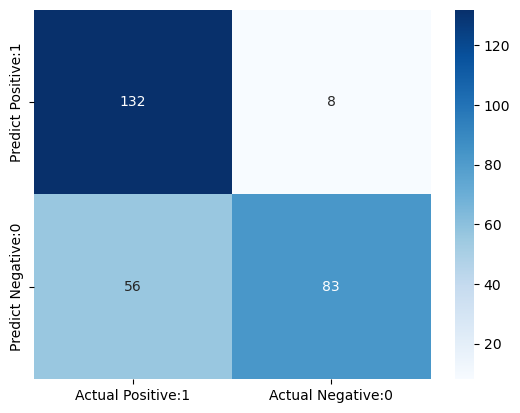

<Figure size 900x900 with 0 Axes>

In [113]:
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [114]:
from sklearn import tree
import graphviz 
import pydotplus
%matplotlib inline

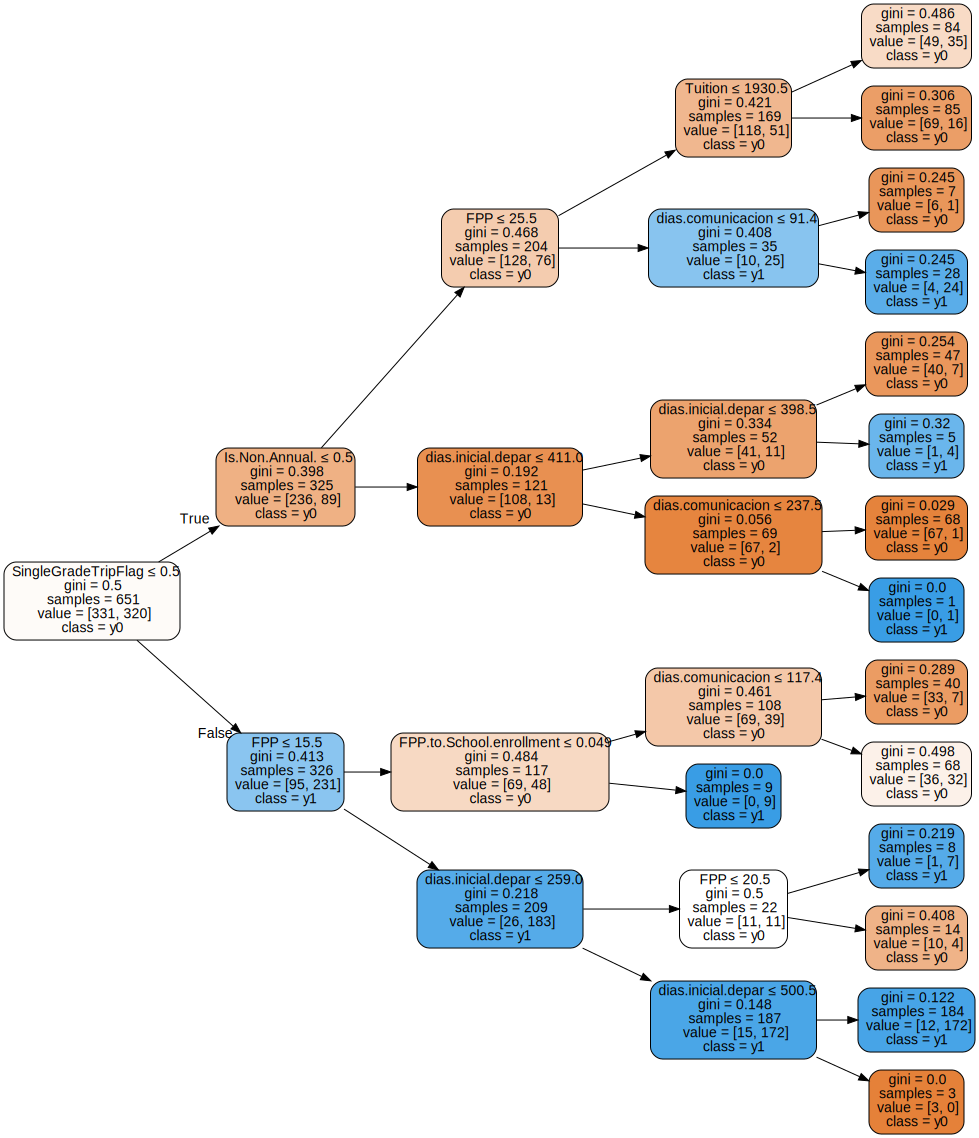

In [115]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph


In [116]:
predicciones = clf_gini.predict_proba(X = X_test)[:, :]
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones

0         1
0    0.811765  0.188235
1    0.065217  0.934783
2    0.811765  0.188235
3    0.065217  0.934783
4    0.851064  0.148936
..        ...       ...
274  0.065217  0.934783
275  0.529412  0.470588
276  0.529412  0.470588
277  0.985294  0.014706
278  0.851064  0.148936

[279 rows x 2 columns]

In [117]:
y_test

439    0
757    1
337    0
474    1
255    0
      ..
586    1
346    0
279    0
116    0
76     0
Name: Retained.in.2012., Length: 279, dtype: int32

In [118]:
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

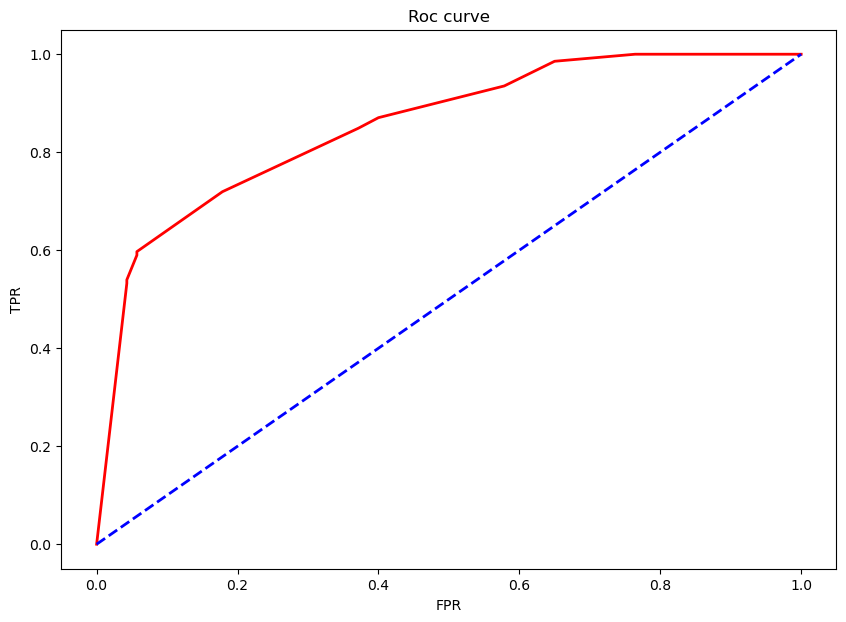

In [119]:

import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Instanciamos el modelo con criterio gini entropy:

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [121]:
y_pred_en = clf_en.predict(X_test)

In [122]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.75


In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.7455197132616488
Precision Score :  0.7455197132616488
Recall Score :  0.7455197132616488
Jaccard Score :  0.5942857142857143


In [124]:
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       140
           1       0.91      0.54      0.68       139

    accuracy                           0.75       279
   macro avg       0.79      0.74      0.73       279
weighted avg       0.79      0.75      0.73       279



<Figure size 900x900 with 0 Axes>

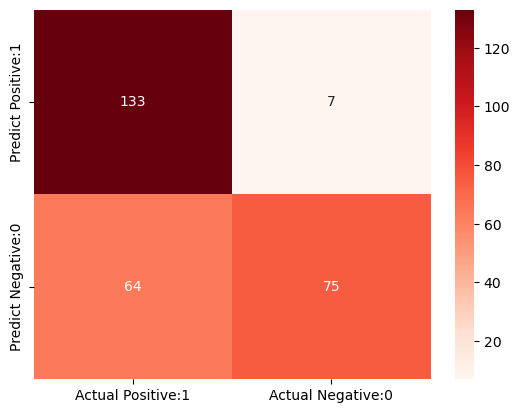

<Figure size 900x900 with 0 Axes>

In [125]:
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

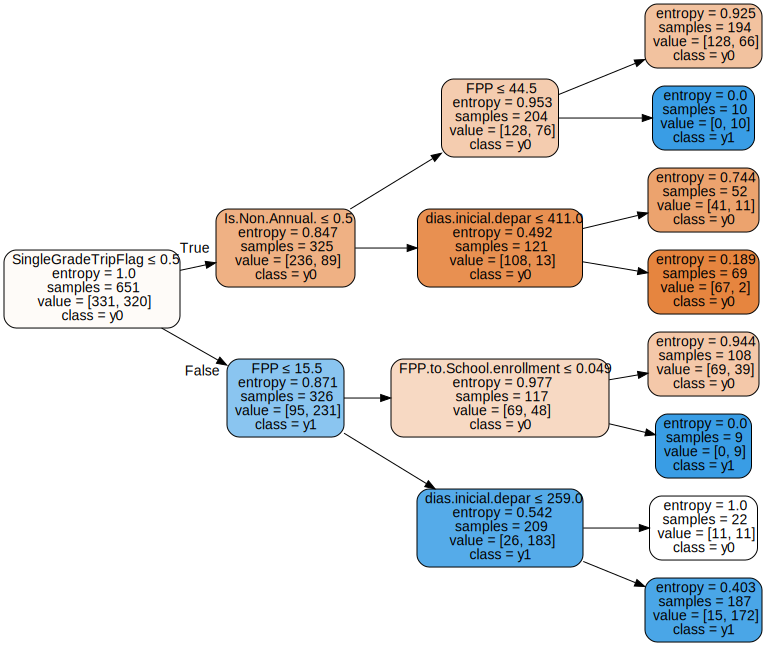

In [126]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

In [127]:
y_pred_prob = clf_en.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

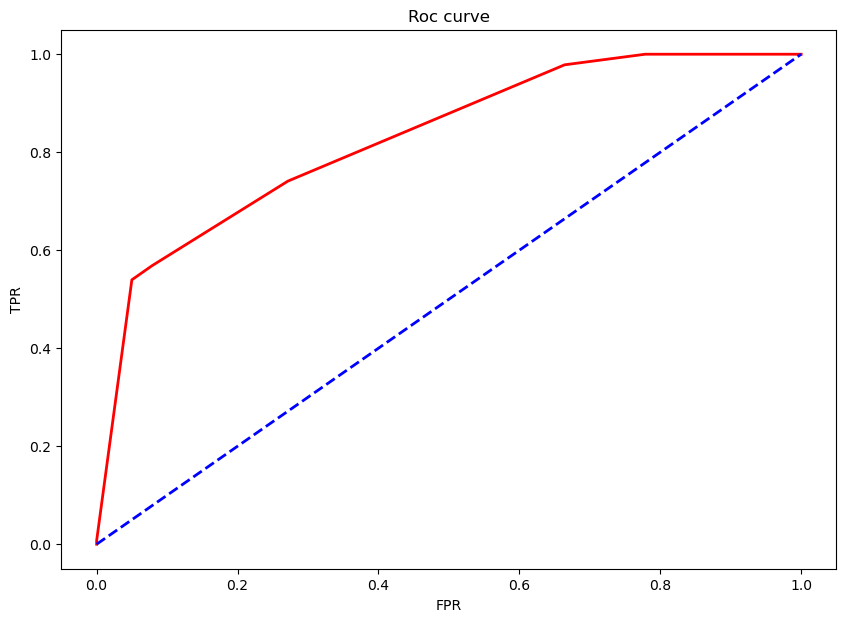

In [128]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# REGRESION LOGISTICA

In [129]:
#se aplica algoritm solo a df con variables elegidas por random forest
X = df_randomForest.drop('Retained.in.2012.', axis=1) 
y = df_randomForest['Retained.in.2012.']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)


In [131]:
X_train.shape

(651, 10)

In [132]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [133]:
y_pred = LR.predict(X_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.75
Precisión en el set de Test: 0.75


In [134]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7455197132616488
Precision Score :  0.7455197132616488
Recall Score :  0.7455197132616488
Jaccard Score :  0.5942857142857143


In [135]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       140
           1       0.75      0.74      0.74       139

    accuracy                           0.75       279
   macro avg       0.75      0.75      0.75       279
weighted avg       0.75      0.75      0.75       279



<Figure size 900x900 with 0 Axes>

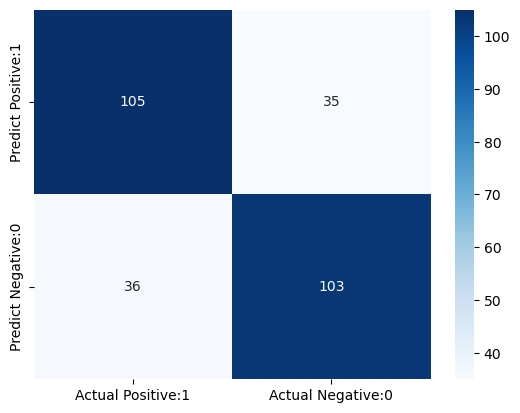

<Figure size 900x900 with 0 Axes>

In [136]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [137]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

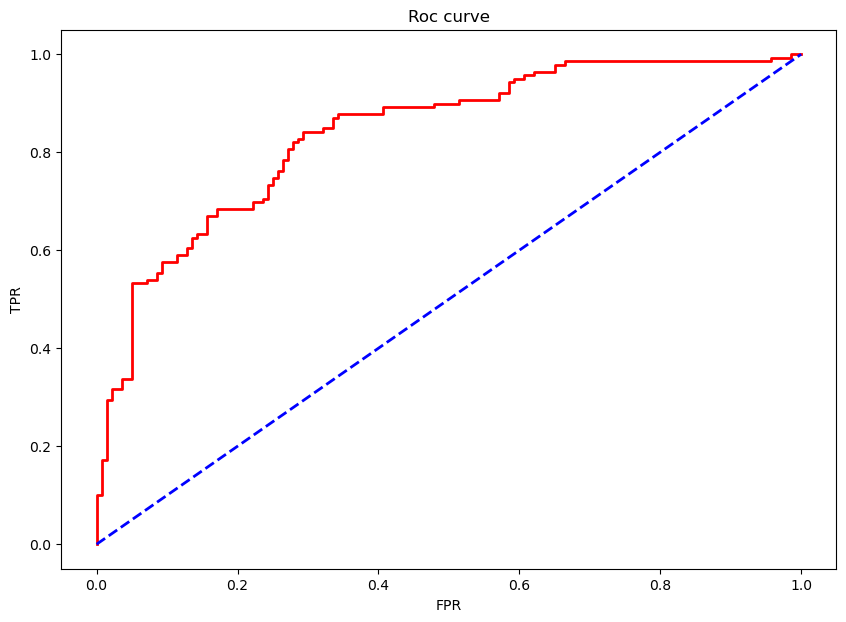

In [138]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [139]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [140]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [-0.4641059]
Coefficients: 


Variable Coefficient
1       SingleGradeTripFlag    1.477518
3                 Total.Pax    0.105916
7                FRP.Active     0.06092
9         dias.comunicacion    0.007297
8                   Tuition   -0.000314
4        dias.inicial.depar   -0.002871
5  FPP.to.School.enrollment   -0.041812
6                From.Grade   -0.081149
2                       FPP   -0.095708
0            Is.Non.Annual.   -1.983681

Regresión logistica sin variables con coef bajos: tuition, dias.inicial.depar y dias.comunicacion

In [141]:

X = df_randomForest.drop(['Retained.in.2012.','Tuition','dias.inicial.depar', 'dias.comunicacion'], axis=1) 
y = df_randomForest['Retained.in.2012.']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)


In [143]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [144]:
y_pred = LR.predict(X_test)

In [145]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.75
Precisión en el set de Test: 0.77


In [146]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7670250896057348
Precision Score :  0.7670250896057348
Recall Score :  0.7670250896057348
Jaccard Score :  0.622093023255814


In [147]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       140
           1       0.76      0.77      0.77       139

    accuracy                           0.77       279
   macro avg       0.77      0.77      0.77       279
weighted avg       0.77      0.77      0.77       279



<Figure size 900x900 with 0 Axes>

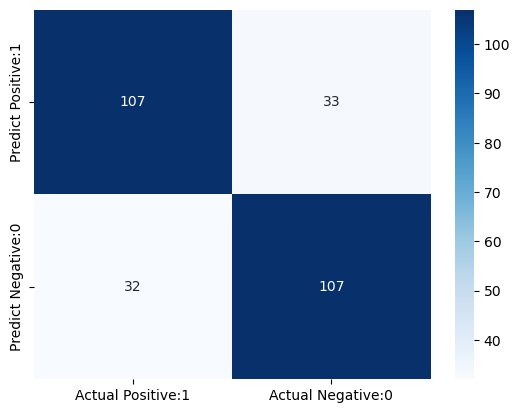

<Figure size 900x900 with 0 Axes>

In [148]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [149]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

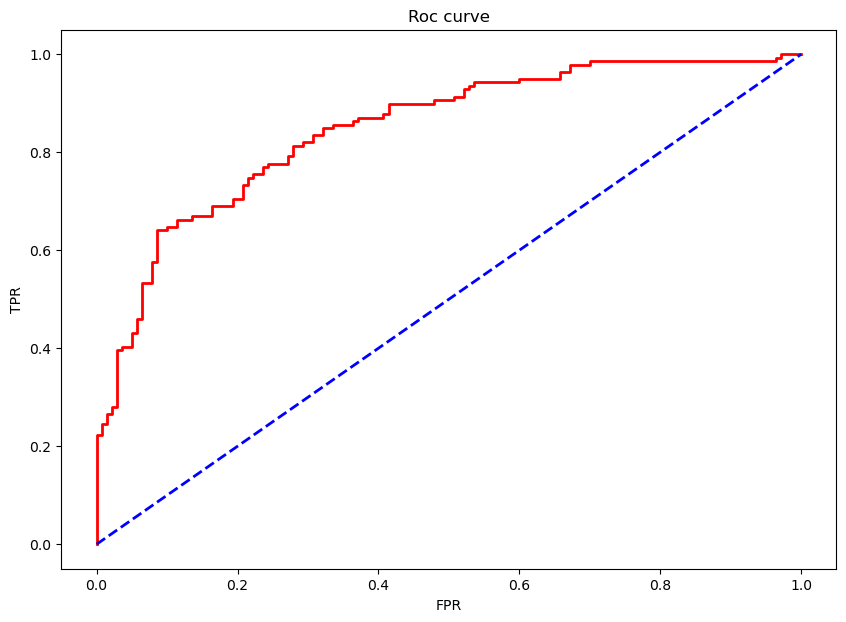

In [150]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# NAIVE BAYES

ALGORITMO GAUSSIAN

In [151]:
X = df_randomForest.drop(['Retained.in.2012.'], axis=1) 
y = df_randomForest['Retained.in.2012.']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [153]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [154]:
y_pred = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.76
Precisión en el set de Test: 0.76


In [155]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))


F-1 Score :  0.7634408602150536
Precision Score :  0.7634408602150538
Recall Score :  0.7634408602150538
Jaccard Score :  0.6173913043478261


In [156]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       140
           1       0.77      0.74      0.76       139

    accuracy                           0.76       279
   macro avg       0.76      0.76      0.76       279
weighted avg       0.76      0.76      0.76       279



<Figure size 900x900 with 0 Axes>

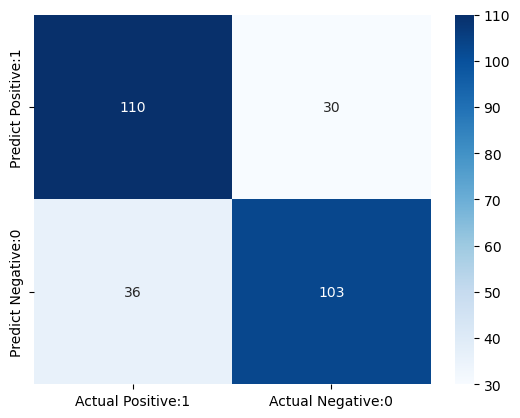

<Figure size 900x900 with 0 Axes>

In [157]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [158]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

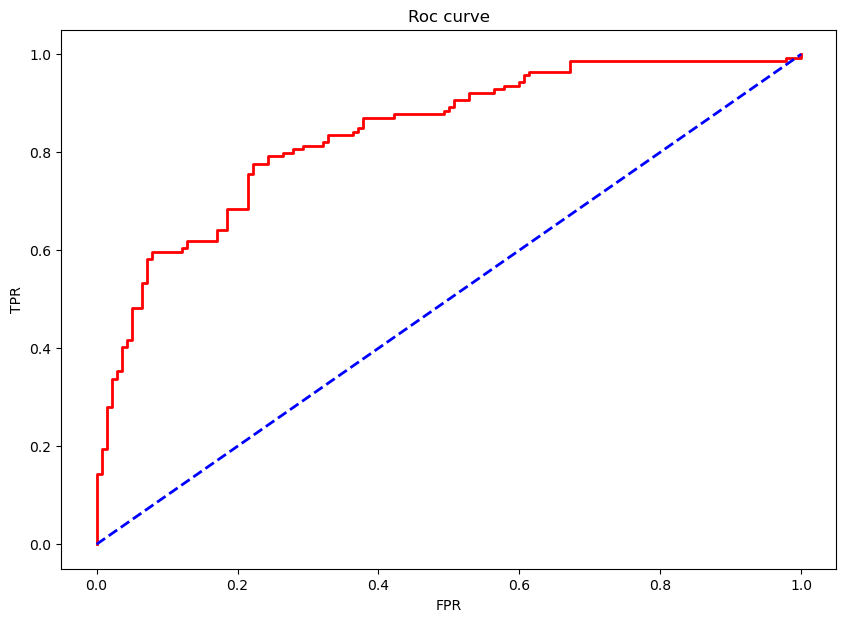

In [159]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

ALGORITMO MULTINOMIAL

In [160]:
X = df_randomForest.drop(['Retained.in.2012.'], axis=1) 
y = df_randomForest['Retained.in.2012.']

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [162]:
from sklearn.naive_bayes import MultinomialNB

In [163]:
Mult = MultinomialNB()
Mult.fit(X_train, y_train)  
y_pred = Mult.predict(X_test)

In [164]:

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.61
Precisión en el set de Test: 0.63


In [165]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6344086021505376
Precision Score :  0.6344086021505376
Recall Score :  0.6344086021505376
Jaccard Score :  0.4645669291338583


In [166]:

print (classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       140
           1       0.66      0.56      0.60       139

    accuracy                           0.63       279
   macro avg       0.64      0.63      0.63       279
weighted avg       0.64      0.63      0.63       279



<Figure size 900x900 with 0 Axes>

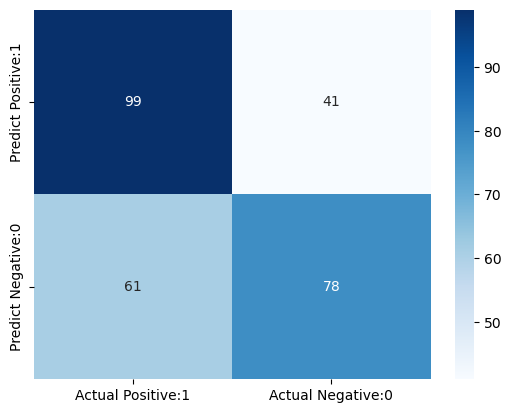

<Figure size 900x900 with 0 Axes>

In [167]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [168]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

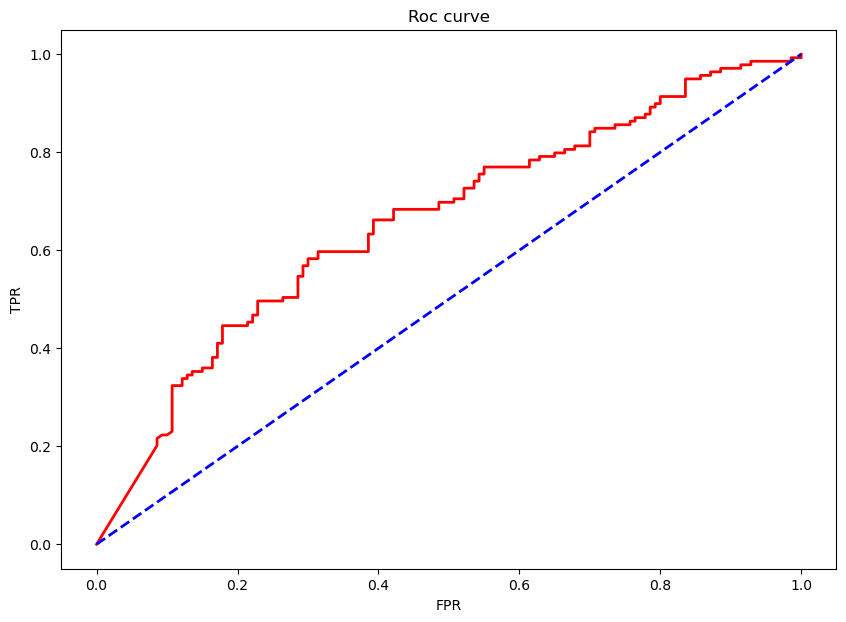

In [169]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# KNN

In [170]:
X = df_randomForest.drop(['Retained.in.2012.'], axis=1) 
y = df_randomForest['Retained.in.2012.']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')
#primero se elige un vecindario de 3 para despues encontrar el optimo en gráfico

In [173]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [174]:
y_pred=knn.predict(X_test)

In [175]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.84
Precisión en el set de Test: 0.68


In [176]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6810035842293907
Precision Score :  0.6810035842293907
Recall Score :  0.6810035842293907
Jaccard Score :  0.5163043478260869


In [177]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       140
           1       0.71      0.61      0.66       139

    accuracy                           0.68       279
   macro avg       0.68      0.68      0.68       279
weighted avg       0.68      0.68      0.68       279



<Figure size 900x900 with 0 Axes>

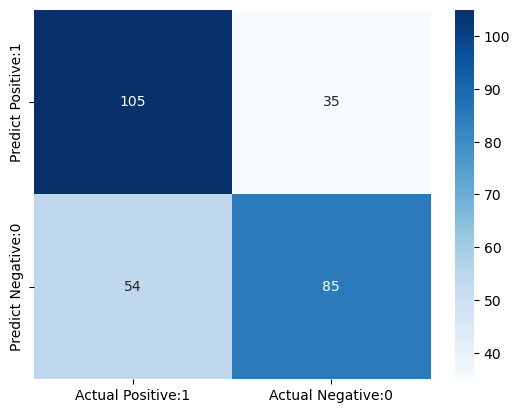

<Figure size 900x900 with 0 Axes>

In [178]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
                                  


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [179]:
# sacar las probabilidades
y_pred_prob = knn.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

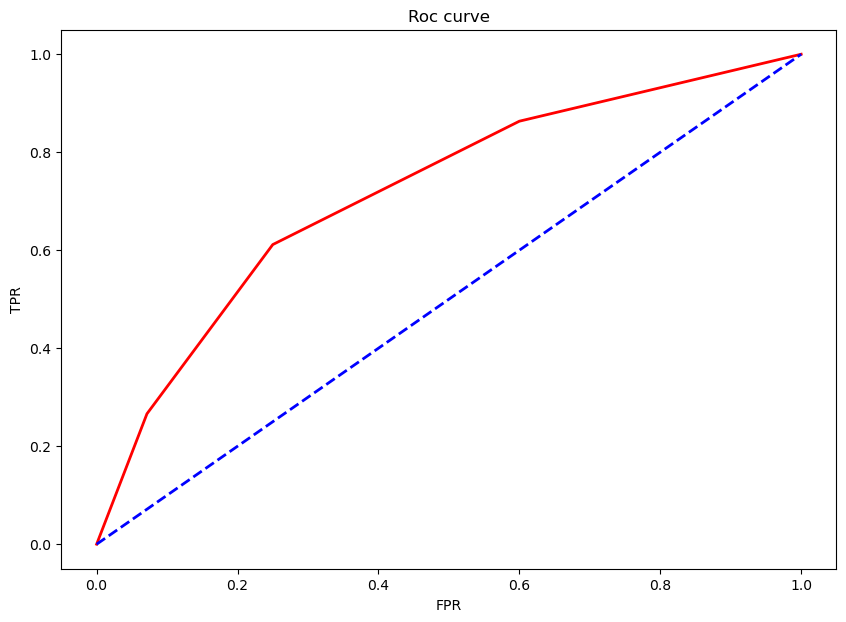

In [180]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Delimitar el valor de K:

In [181]:
vecinos=np.arange(1,20)
vecinos #no se genera un array mas grande, por que las inflexiones (codo) ya se logran ver dentro de los 20.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [182]:
train_ex =np.empty(len(vecinos))
test_ex =np.empty(len(vecinos))

In [183]:
for i, k in enumerate(vecinos):
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit(X_train, y_train)
    train_ex[i] = knn.score(X_train, y_train)
    test_ex[i] = knn.score(X_test, y_test)

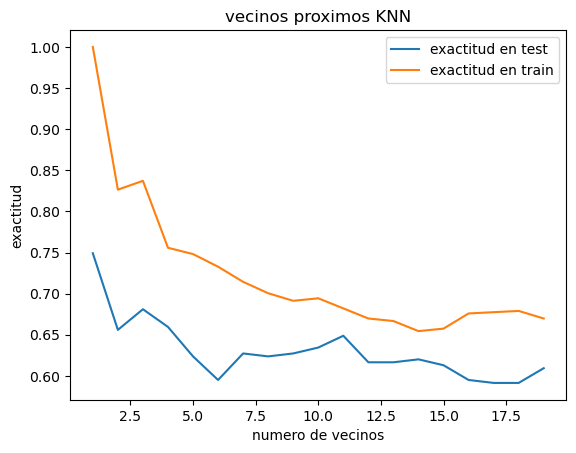

In [184]:
plt.title("vecinos proximos KNN")
plt.plot(vecinos, test_ex, label = "exactitud en test")
plt.plot(vecinos, train_ex, label = "exactitud en train")
plt.legend()
plt.xlabel("numero de vecinos")
plt.ylabel("exactitud")
plt.show()
#viendo el grafico, el segundo punto de inflexion estaria en 3 aprox

# SUPORT VECTOR MACHINE

In [185]:
X = df_randomForest.drop(['Retained.in.2012.'], axis=1) 
y = df_randomForest['Retained.in.2012.']

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

Estimación de un hiperplano lineal no óptimo:

In [187]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [188]:
y_pred = svc.predict(X_test)

In [189]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(svc.score(X_train, y_train)))  
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.57
Precisión en el set de Test: 0.61


In [190]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.5304659498207885


In [191]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       140
           1       0.53      0.46      0.49       139

    accuracy                           0.53       279
   macro avg       0.53      0.53      0.53       279
weighted avg       0.53      0.53      0.53       279



<Figure size 900x900 with 0 Axes>

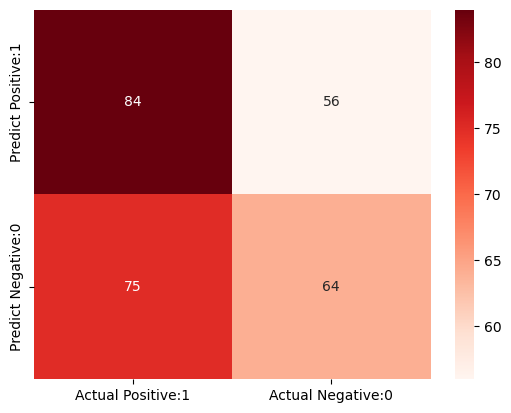

<Figure size 900x900 with 0 Axes>

In [192]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [193]:
# sacar las probabilidades
y_pred_prob = svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

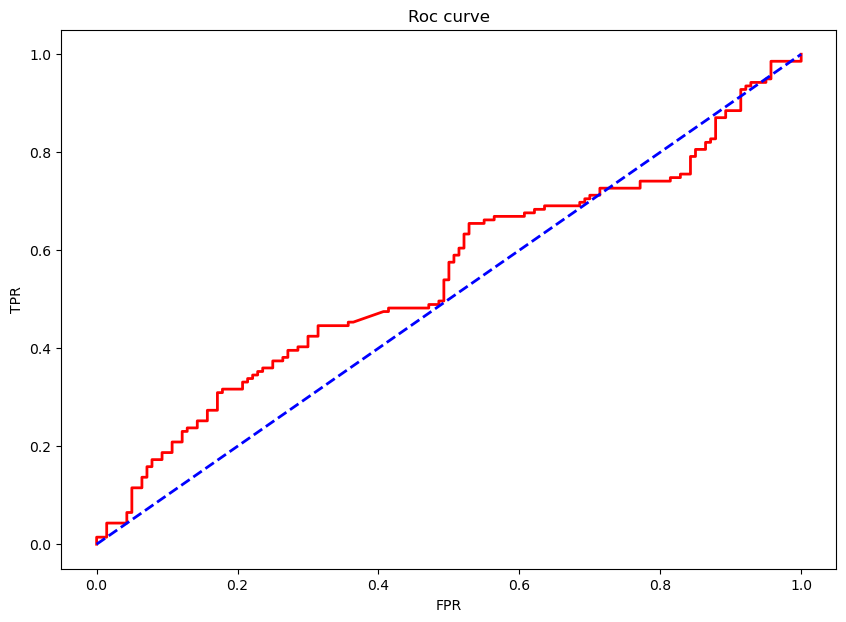

In [194]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Obtener C Grid Search:

In [195]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1, 1, 10, 100, 1000], "gamma":[1, 0.1, 0.01, 0.001, 0.0001]}

In [196]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [197]:
grid.best_params_

{'C': 1, 'gamma': 1}

Estimación con kernell lineal (hiperplano lineal óptimo):

In [198]:
linear_classifier = SVC(kernel='linear', C=1, gamma=1, probability=True).fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
#C y gamma en base a grid.best_params

In [199]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(linear_classifier.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(linear_classifier.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.75
Precisión en el set de Test: 0.76


In [200]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7562724014336918


In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       140
           1       0.79      0.70      0.74       139

    accuracy                           0.76       279
   macro avg       0.76      0.76      0.76       279
weighted avg       0.76      0.76      0.76       279



<AxesSubplot:>

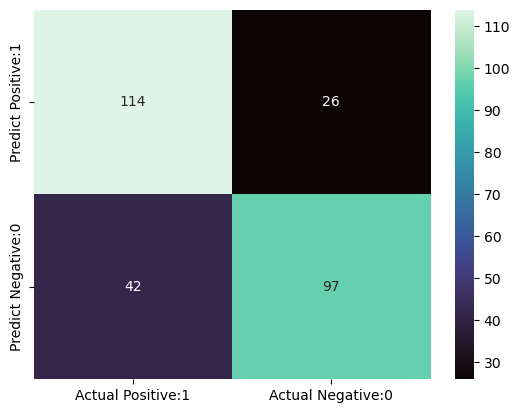

In [202]:

# Matriz de confusión para SVM Linear Kernel
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [203]:
# sacar las probabilidades
y_pred_prob = linear_classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

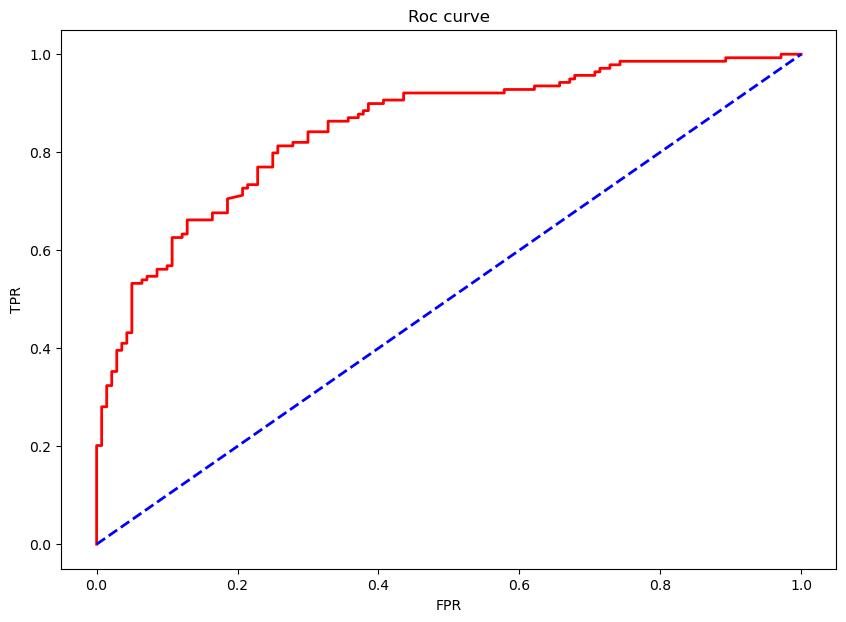

In [204]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Gaussian RBF:

In [205]:
rbf_svc=SVC(kernel='rbf', C=1, gamma=1,probability=True).fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)

In [206]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rbf_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rbf_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.84


In [207]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.8387096774193549


In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       140
           1       0.76      1.00      0.86       139

    accuracy                           0.84       279
   macro avg       0.88      0.84      0.83       279
weighted avg       0.88      0.84      0.83       279



<AxesSubplot:>

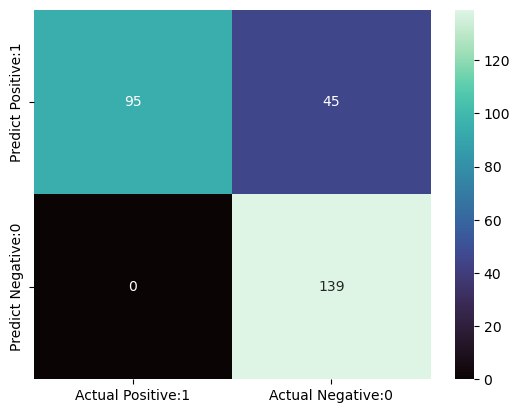

In [209]:
# Matriz de confusión Gaussian RBF
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [210]:
# sacar las probabilidades
y_pred_prob = rbf_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

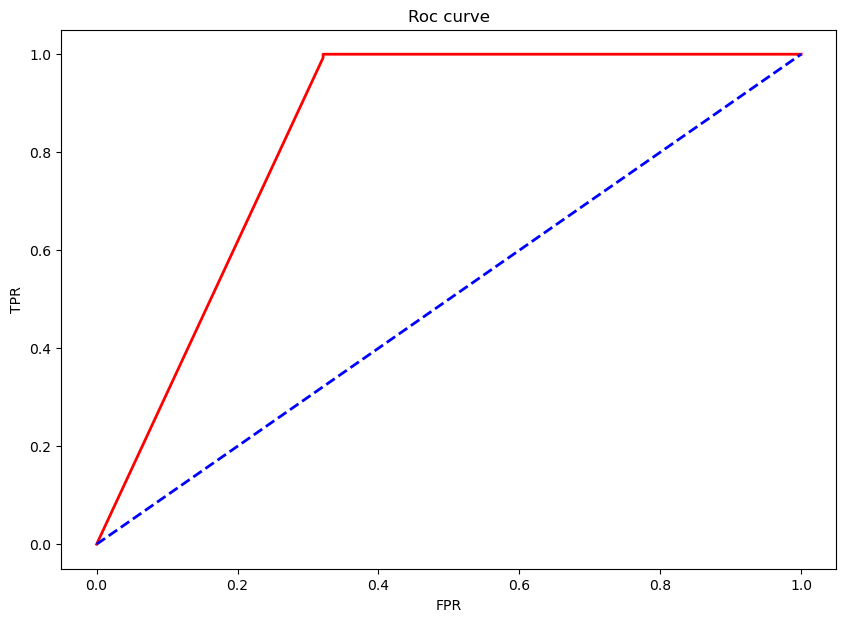

In [211]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Polynomial:


In [212]:
Poly_svc=SVC(kernel='poly', C=1,probability=True).fit(X_train,y_train) 
y_pred = Poly_svc.predict(X_test)#con gamma:1 no termina de ejecutar, por lo cual se considera solo C=1

In [213]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Poly_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Poly_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.58
Precisión en el set de Test: 0.54


In [214]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.5448028673835126


In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       140
           1       0.54      0.61      0.57       139

    accuracy                           0.54       279
   macro avg       0.55      0.55      0.54       279
weighted avg       0.55      0.54      0.54       279



<AxesSubplot:>

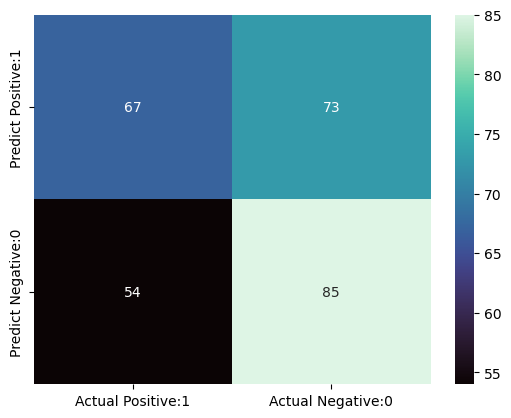

In [216]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')


In [217]:
# sacar las probabilidades
y_pred_prob = Poly_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

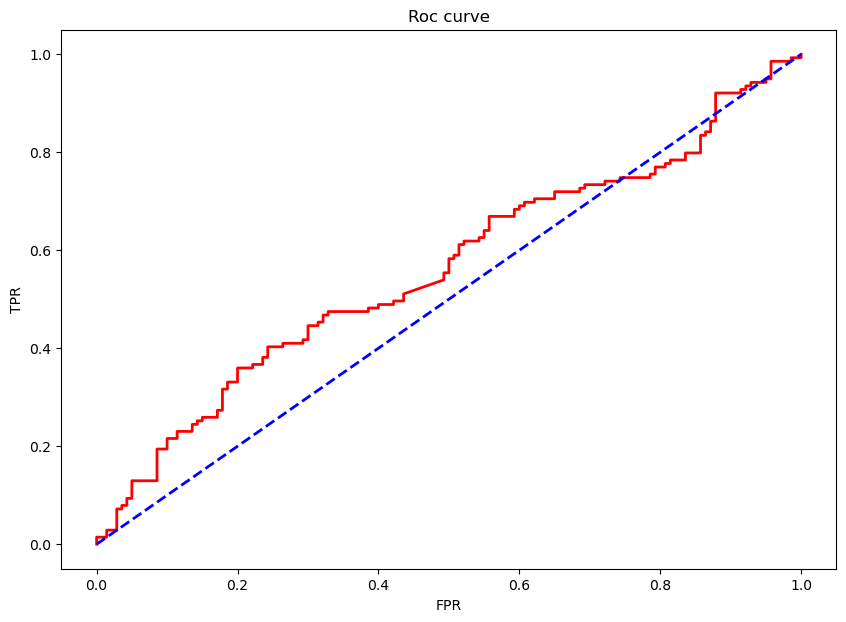

In [218]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Sigmoid:

In [219]:
Sig_svc=SVC(kernel='sigmoid', C=1, gamma=1,probability=True).fit(X_train,y_train)
y_pred = Sig_svc.predict(X_test)

In [220]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Sig_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Sig_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.51
Precisión en el set de Test: 0.50


In [221]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.5017921146953405


In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       140
           1       0.00      0.00      0.00       139

    accuracy                           0.50       279
   macro avg       0.25      0.50      0.33       279
weighted avg       0.25      0.50      0.34       279



<AxesSubplot:>

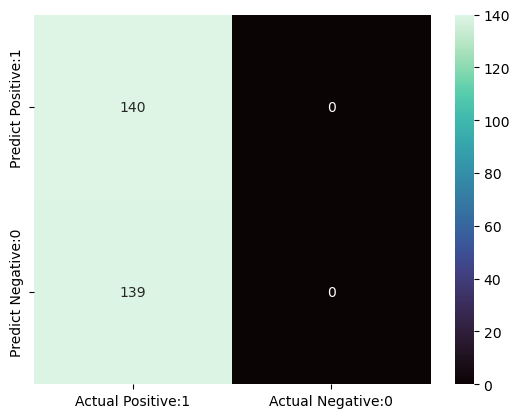

In [223]:
# Matriz de confusión Sigmoid
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [224]:
# sacar las probabilidades
y_pred_prob = Sig_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

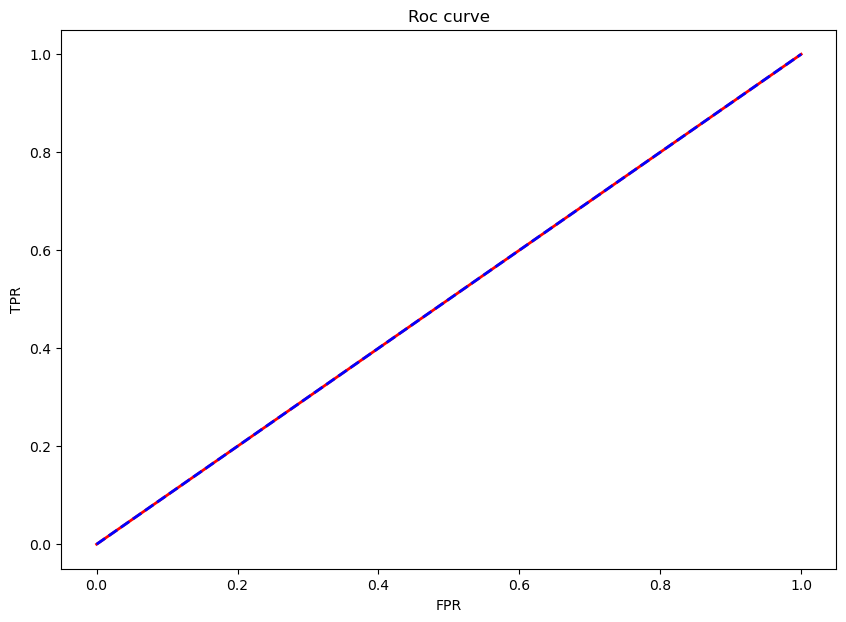

In [225]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()